In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from scipy.signal import savgol_filter

In [2]:
def unpack_data(fname, skiprows=23):
    df=pd.read_csv(fname, skiprows=skiprows)
    df = df.rename(columns = {'Time (s)': 't', 'Channel 1 (V)': 'V1', 'Channel 2 (V)':'V2'})
    return df

font = {'size'   : 20}

matplotlib.rc('font', **font)

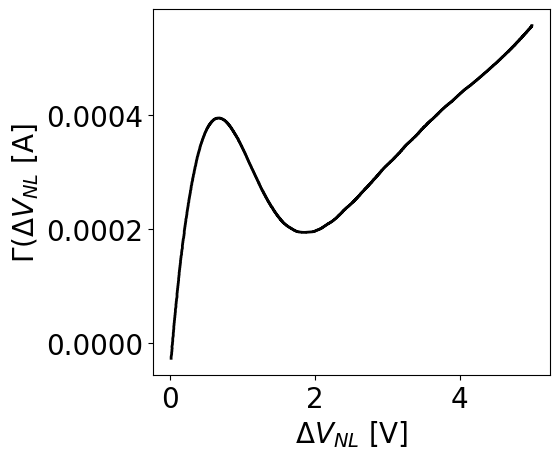

In [3]:
df = unpack_data('data/no_supply_test/Nshape_10kparallel_10ohmseries_V_gg_3.csv')

df2 = df[df.t<2]
df2 = df2[df2.t>0.01]

I00 = df2.V1/10
V00 = df2.V2

fig, ax = plt.subplots(figsize=(6,5))

# ax.plot(V00, I00, alpha=0.2)

# ax.set_xlabel(r'$V_{dd}$ [V]')
# ax.set_ylabel(r'$I_{ds}$ [A]')

ax.set_xlabel(r'$\Delta V_{NL}$ [V]')
ax.set_ylabel(r'$\Gamma(\Delta V_{NL}$ [A]')
# plt.show()


Ihat = savgol_filter(I00, 1000, 3)
ax.plot(V00, Ihat, color='k',linewidth=2)

fig.tight_layout()
fig.savefig('figures/gamma_delta_v_02.png')

# poly = np.polyfit(V00,I01,3)
# # poly[2]*=2
# # print(poly)
# # poly2 = [5e-6, -6e-6, 2e-5, -2e-6]
# poly_y = np.poly1d(poly)(V00)
# plt.plot(V00, poly_y)

# plt.plot(np.arange(len(V00)), V00)
# print(V00)

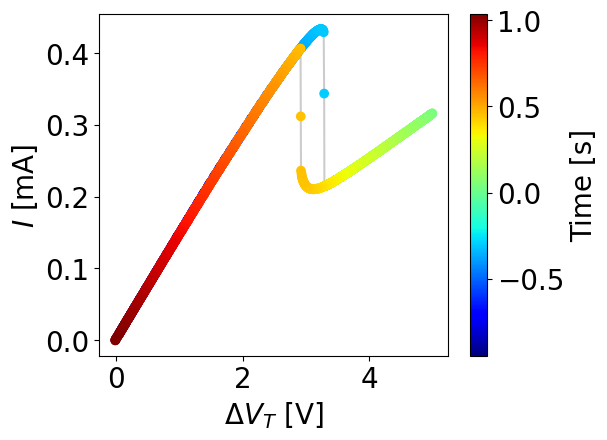

In [6]:
filename = 'data/one_NDR_linear_series/one_NDR_trianglewave_two_3kohm.csv'
df = unpack_data(filename)

df2 = df[df.t < 1.04]
df2 = df2[df2.t > -0.95]

I_LR = df2.V1/(3e3)*1e3
V0 = df2.V2

fig, ax = plt.subplots()
ax.plot(V0, I_LR, alpha=0.2, color='k', zorder=0)
cax = ax.scatter(V0, I_LR, c=df2.t, cmap='jet')
fig.colorbar(cax, label='Time [s]')
ax.set_xlabel(r'$\Delta V_T$ [V]')
ax.set_ylabel(r'$I$ [mA]')
# ax.set_title(r'$R=3k\Omega$')
fig.tight_layout()
fig.savefig('figures/hysteresis_1NDR1LR.png')
plt.show()


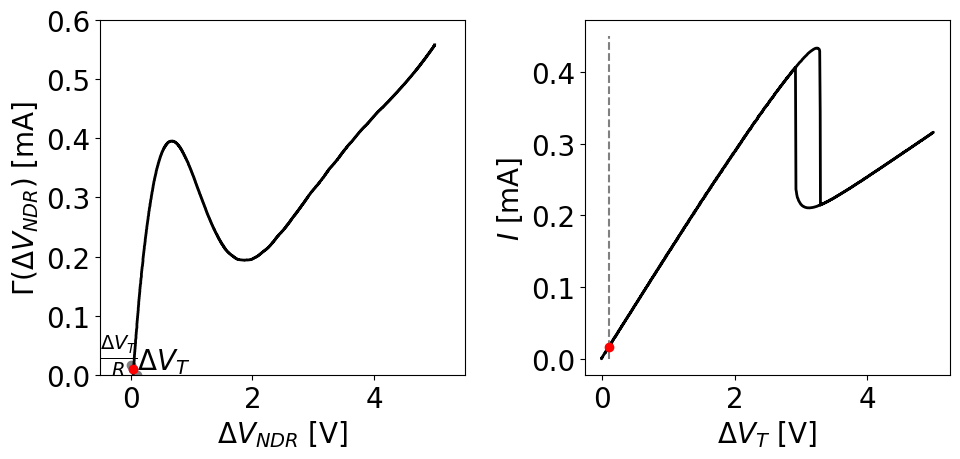

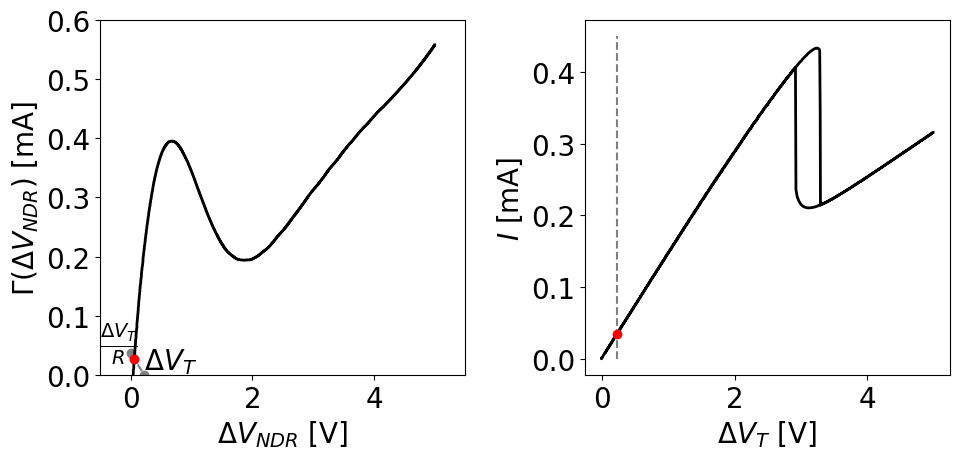

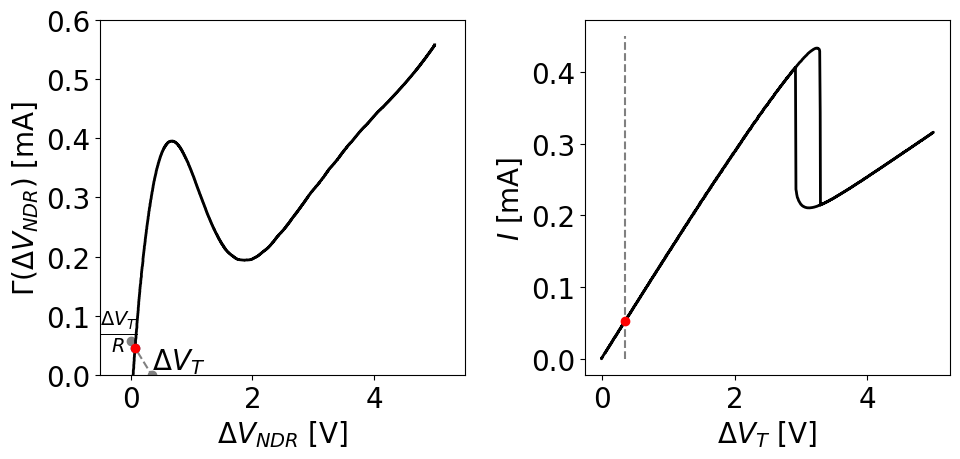

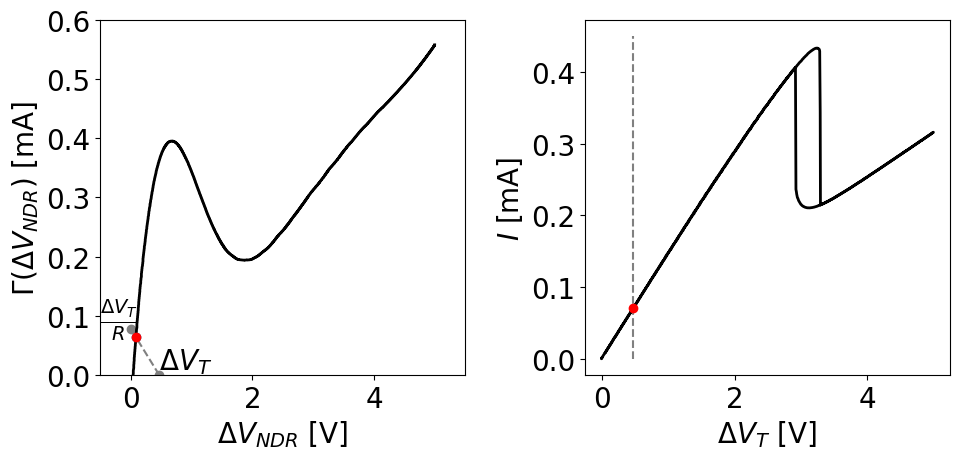

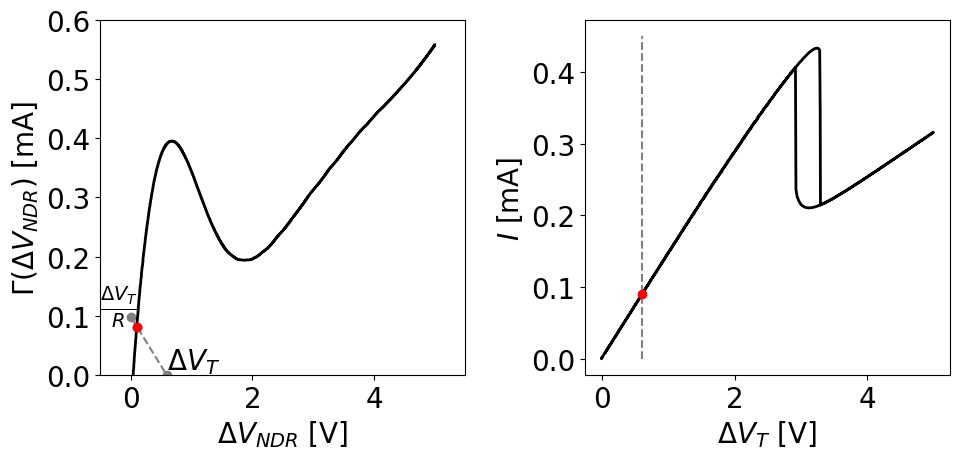

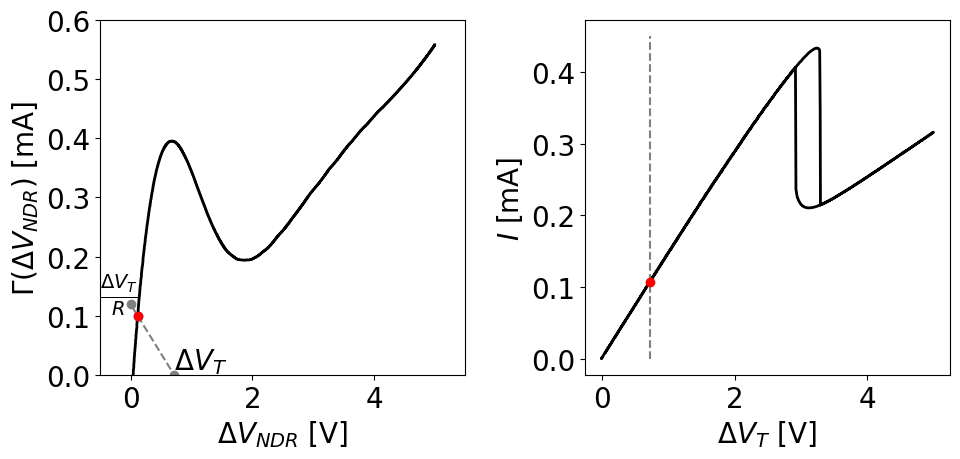

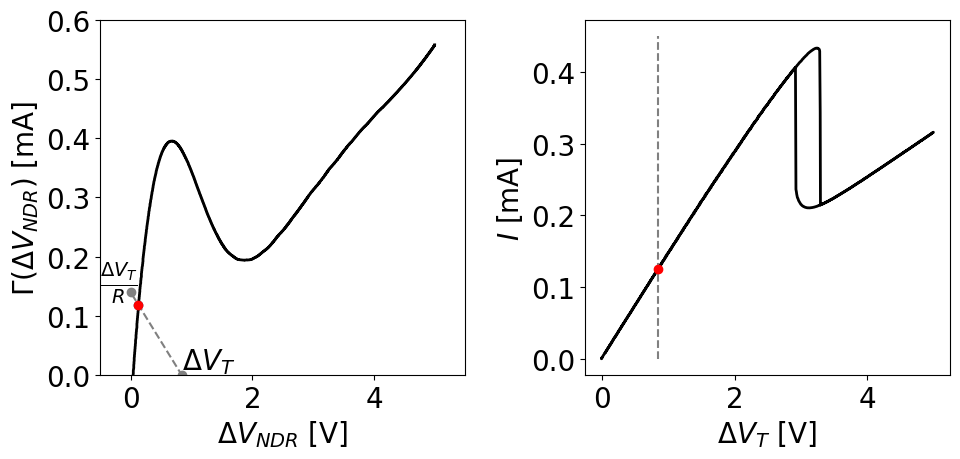

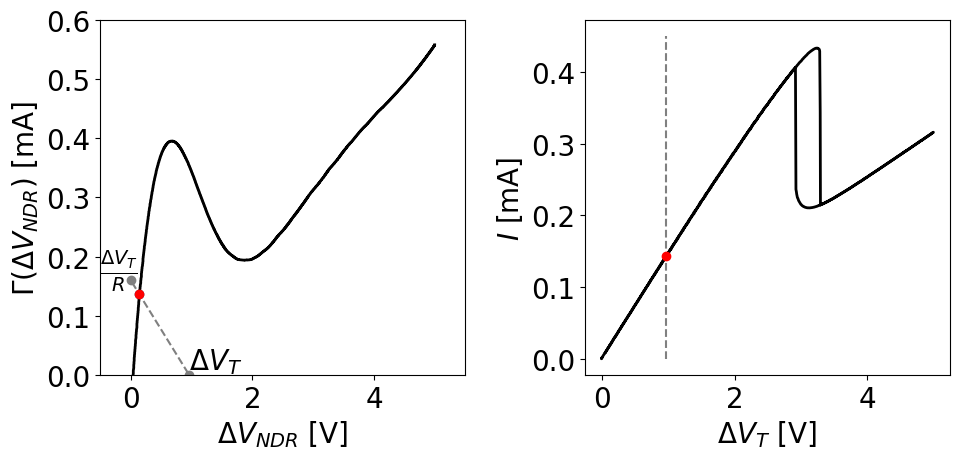

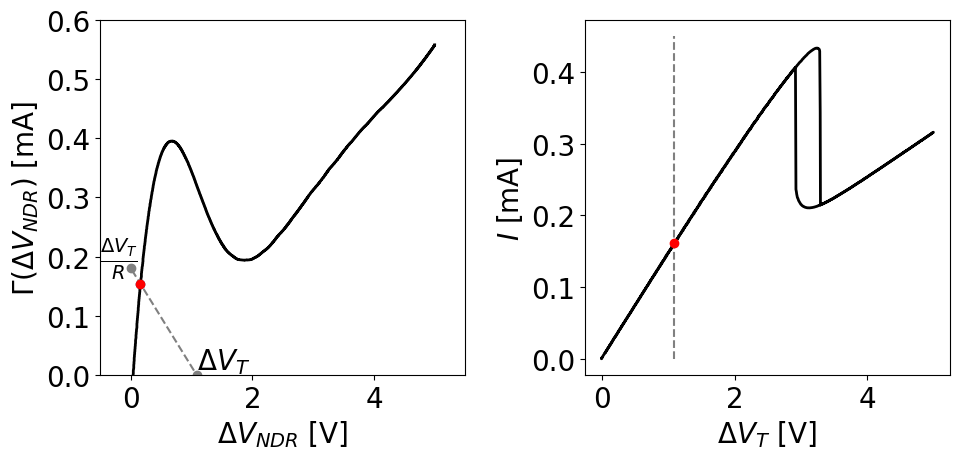

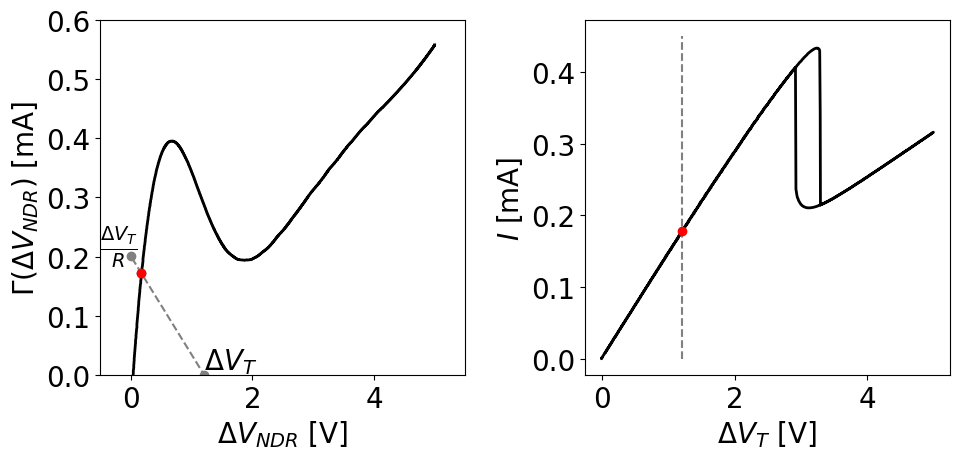

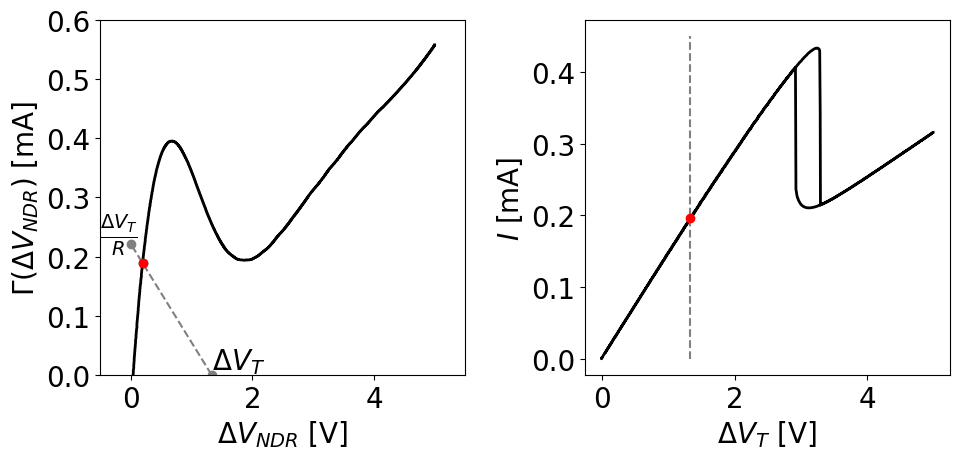

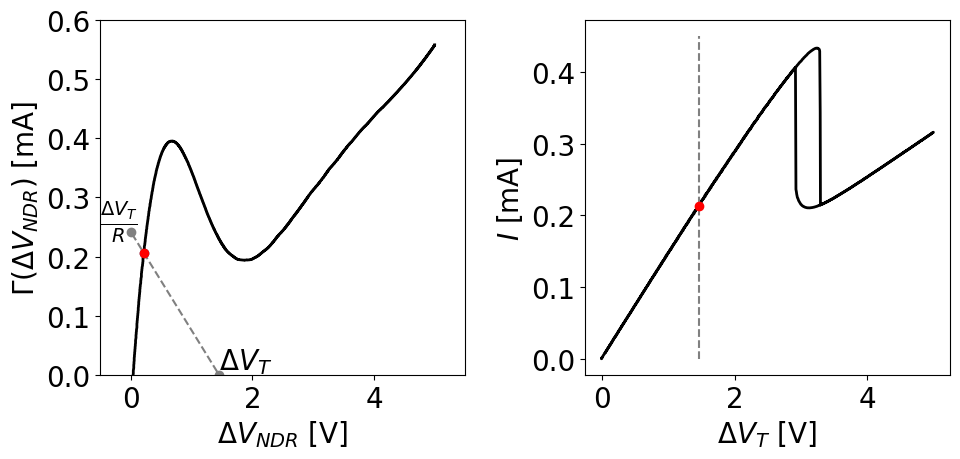

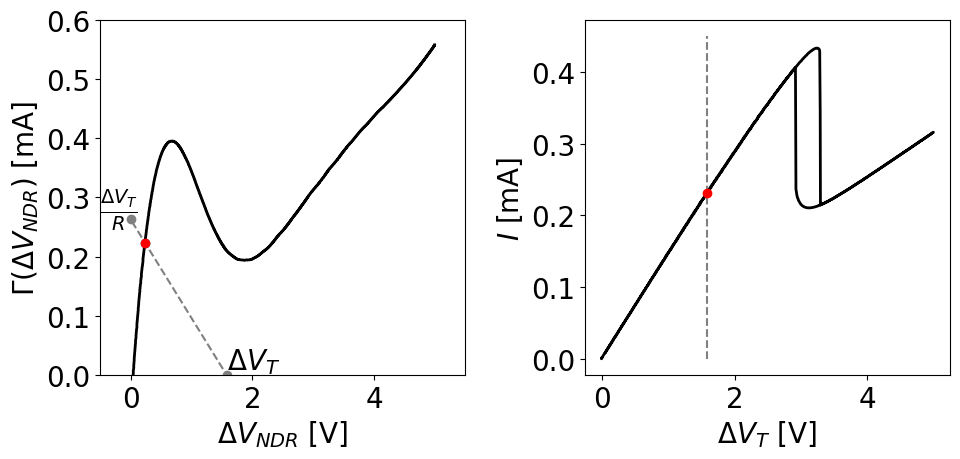

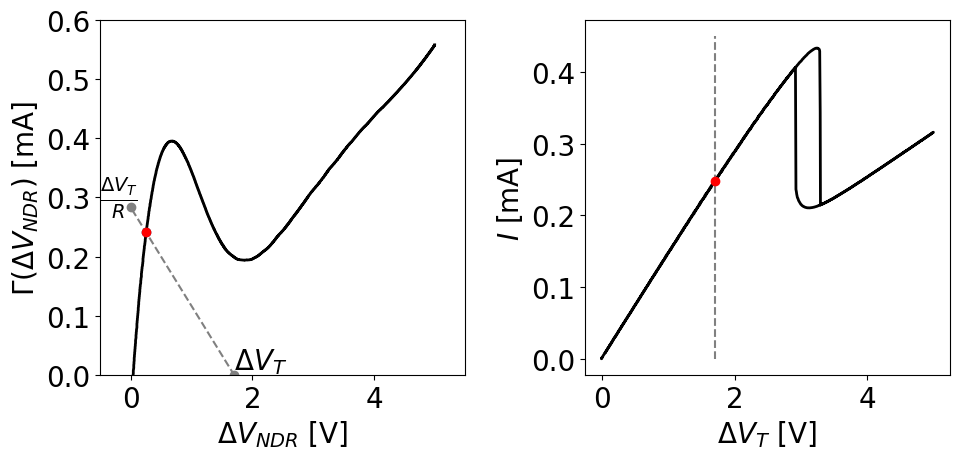

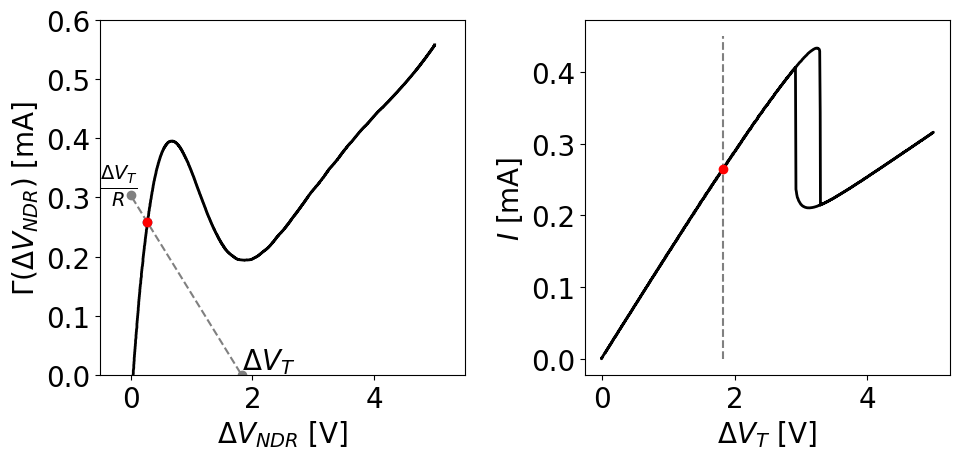

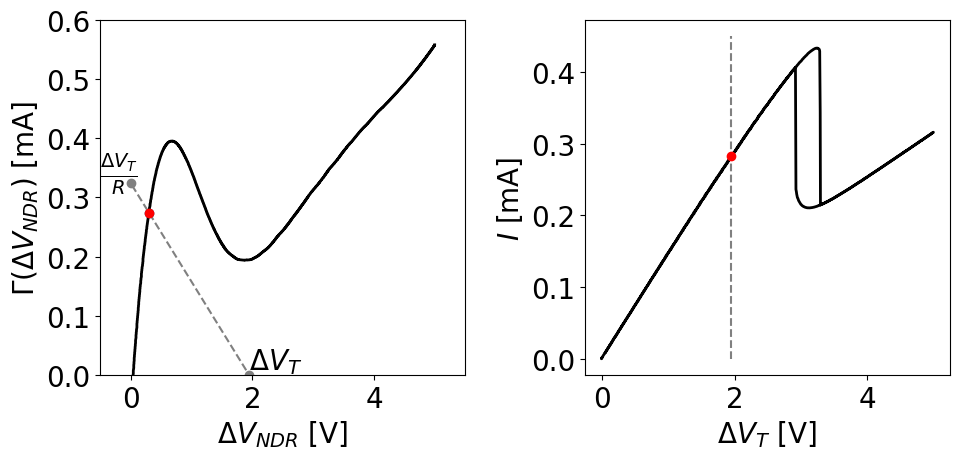

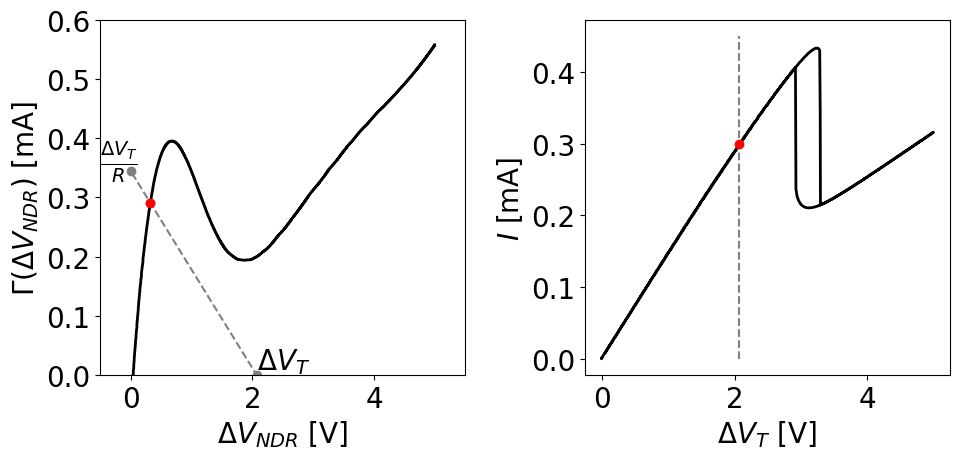

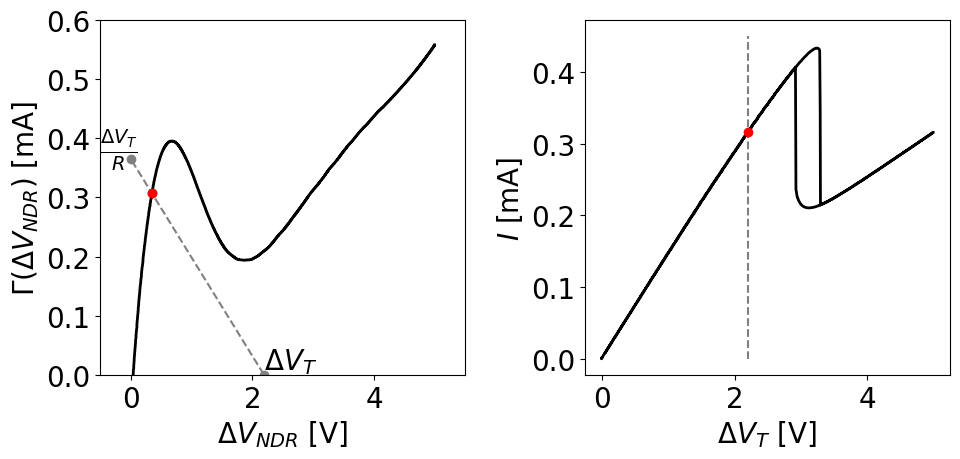

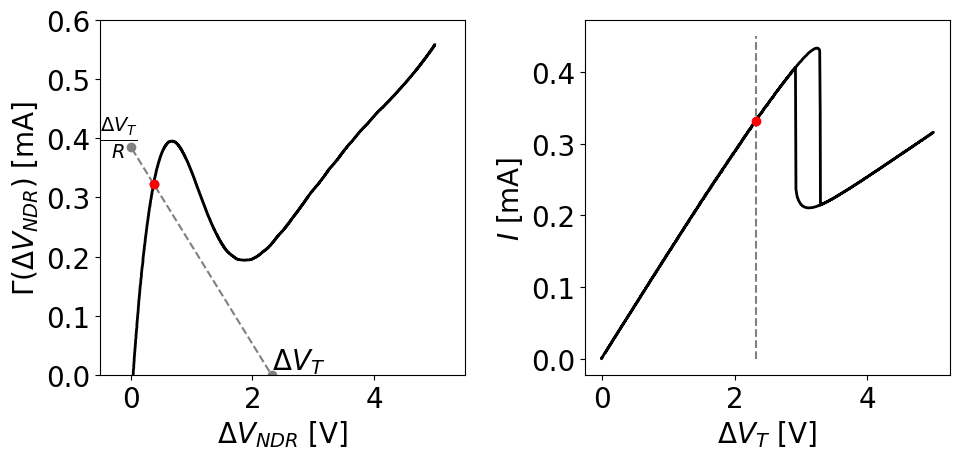

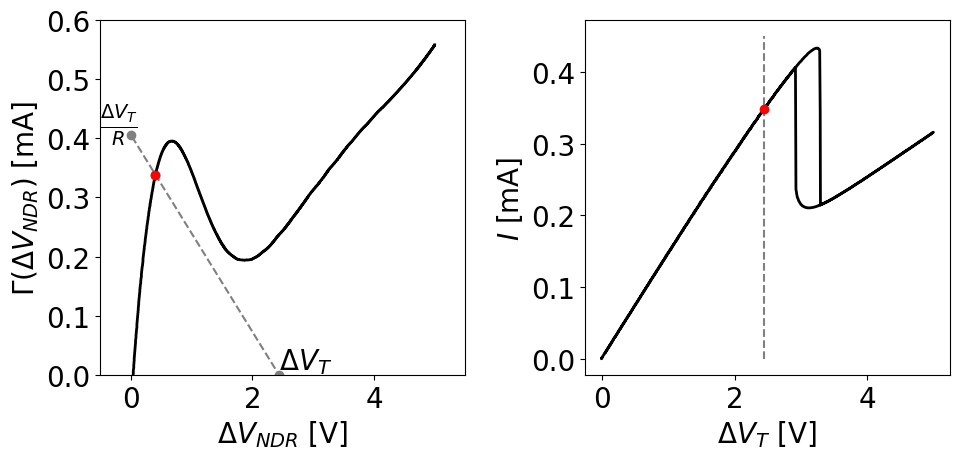

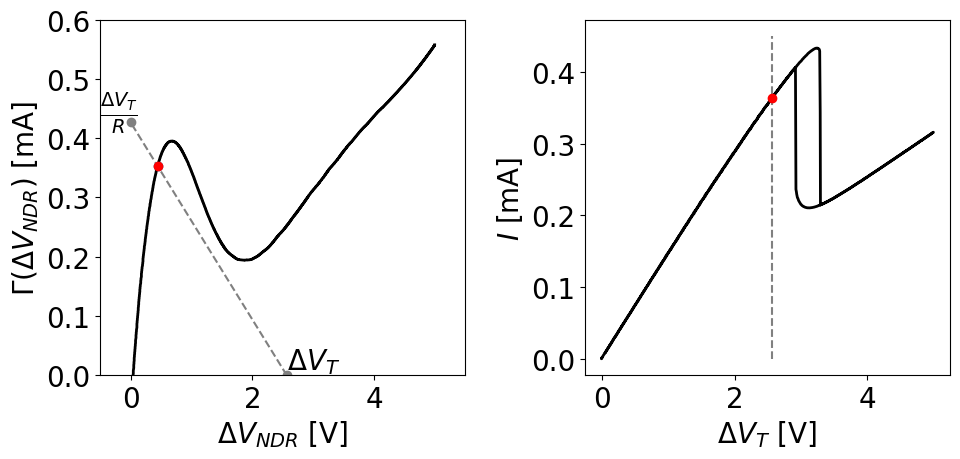

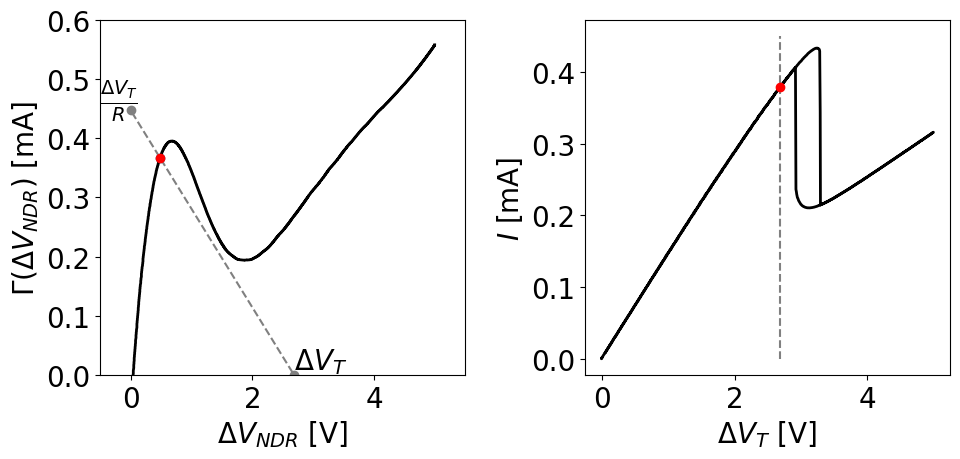

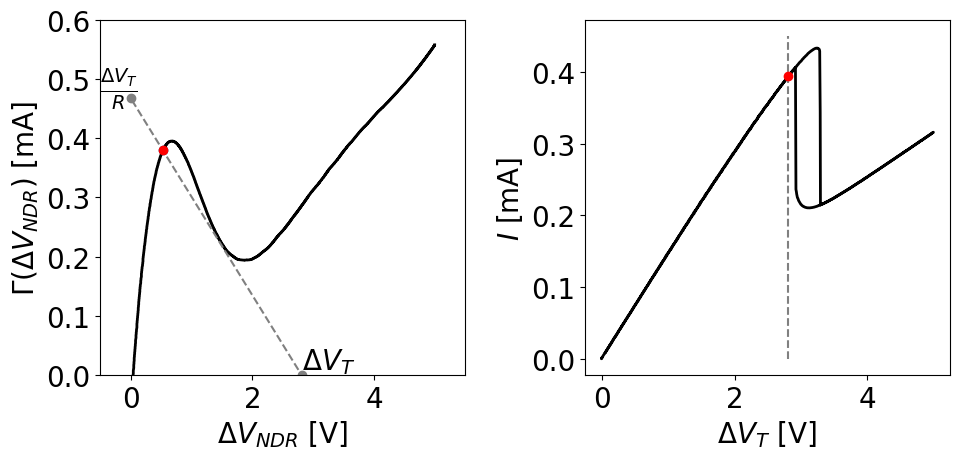

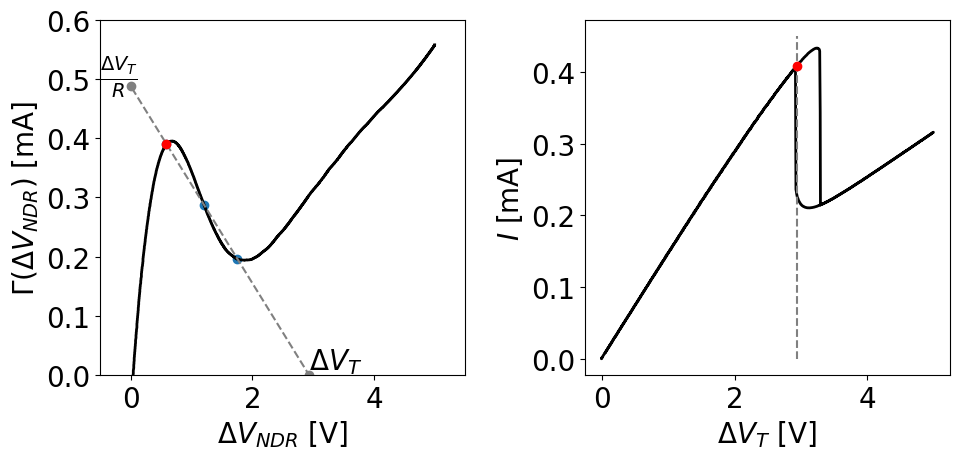

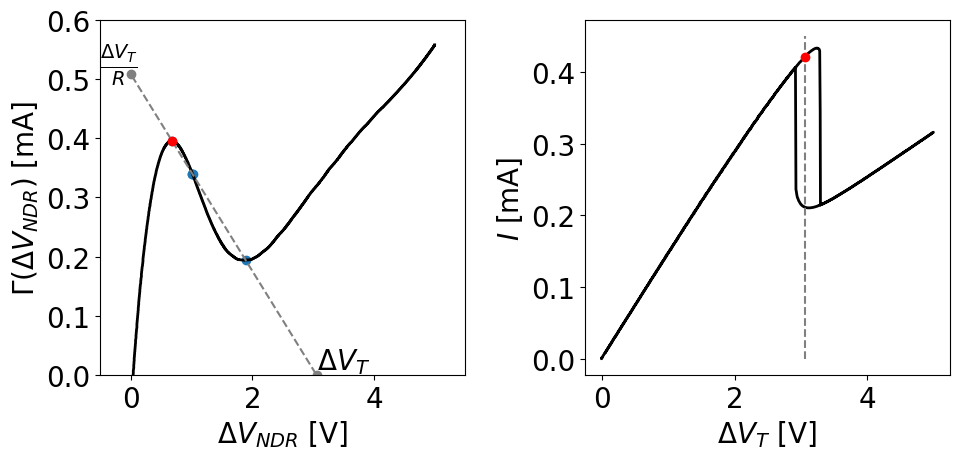

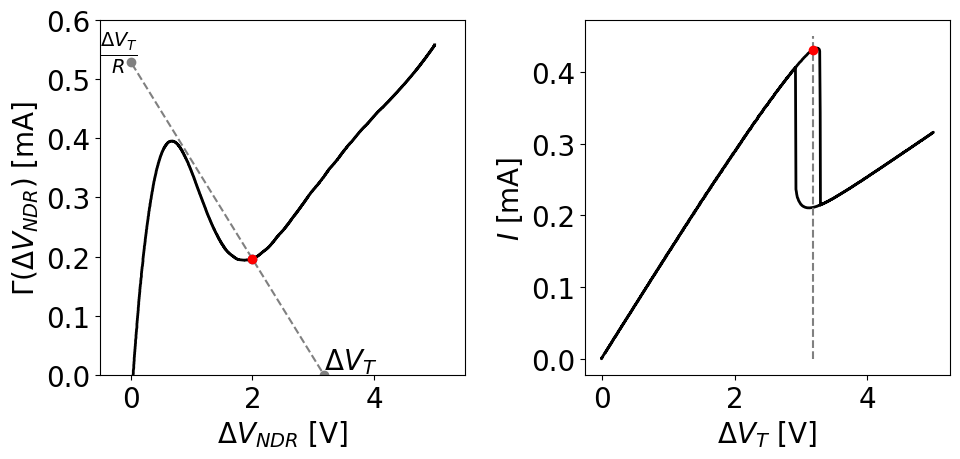

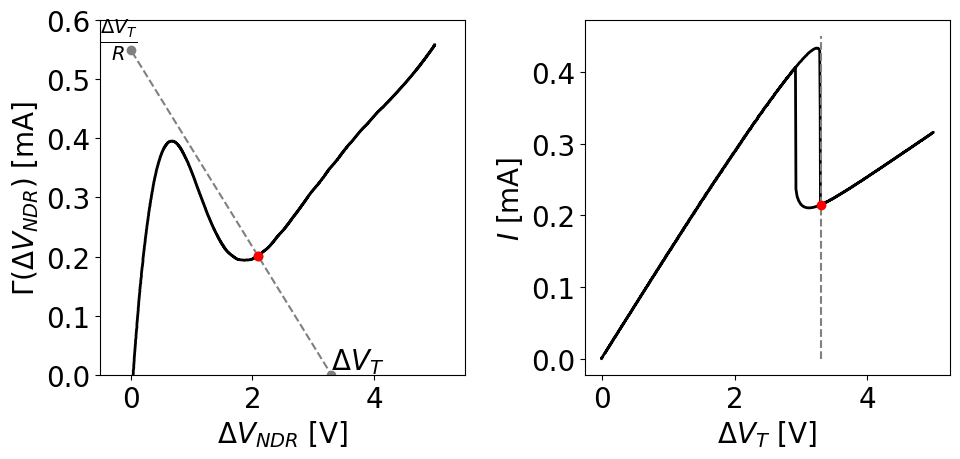

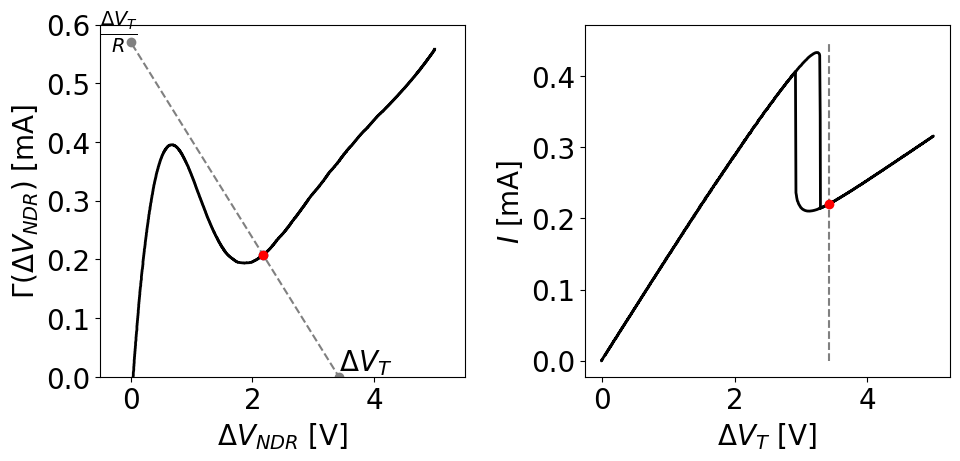

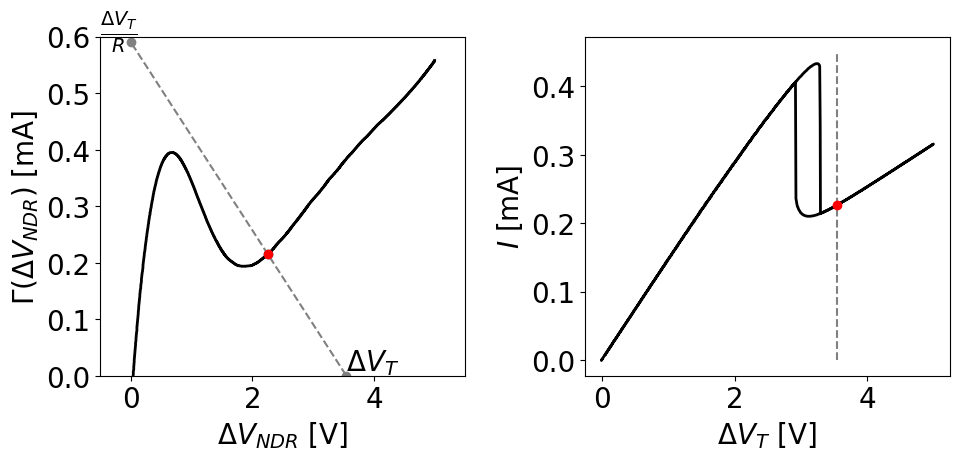

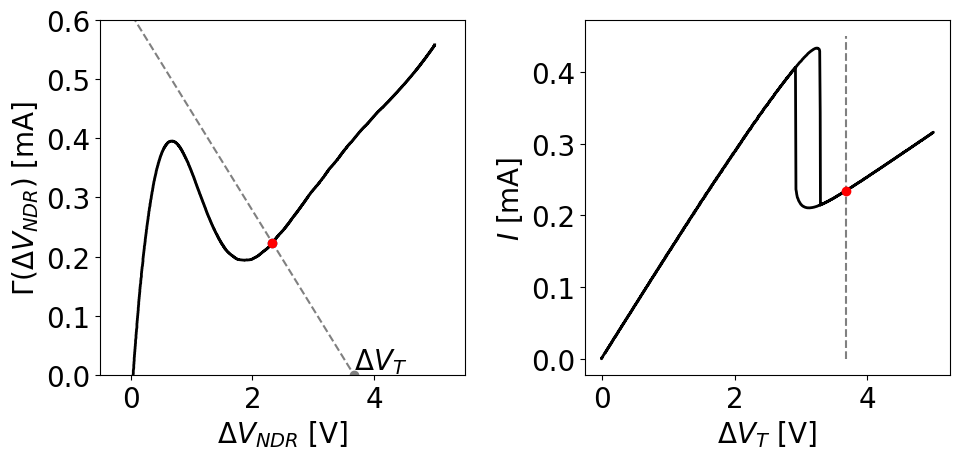

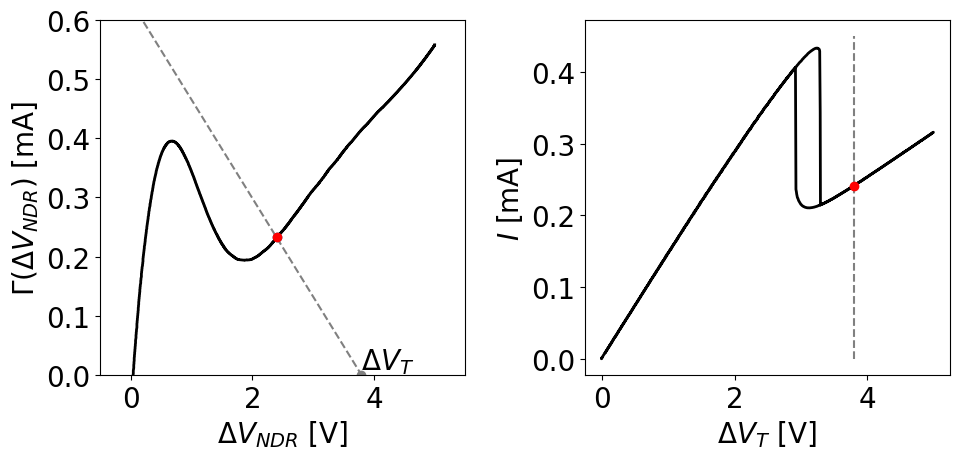

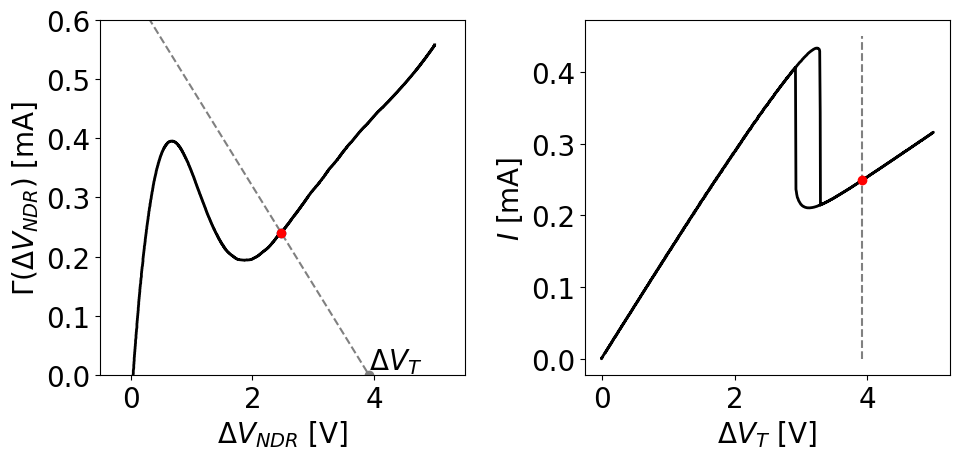

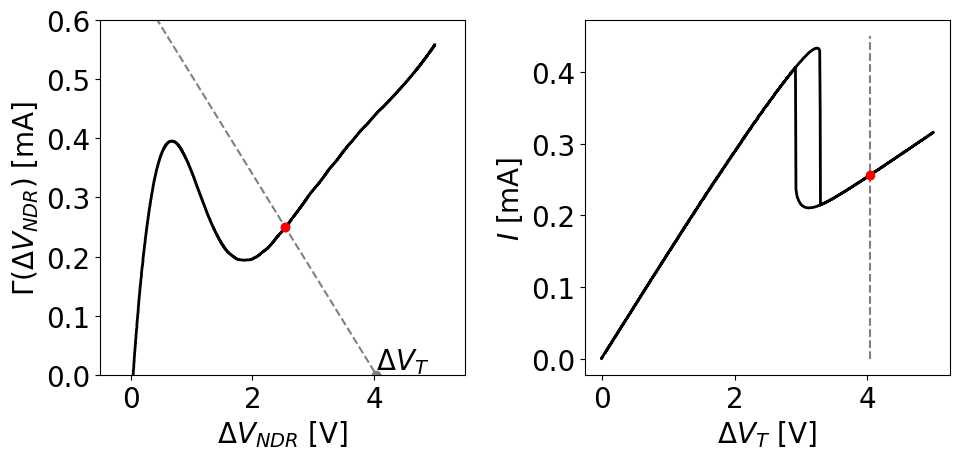

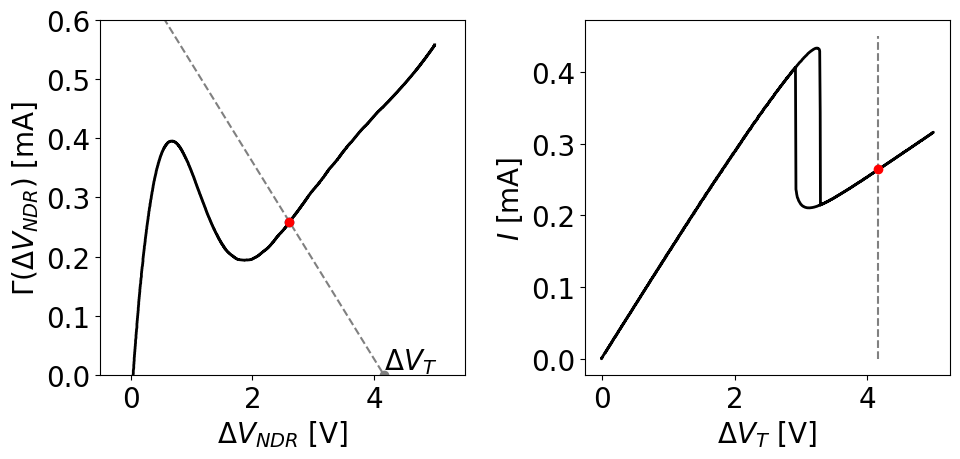

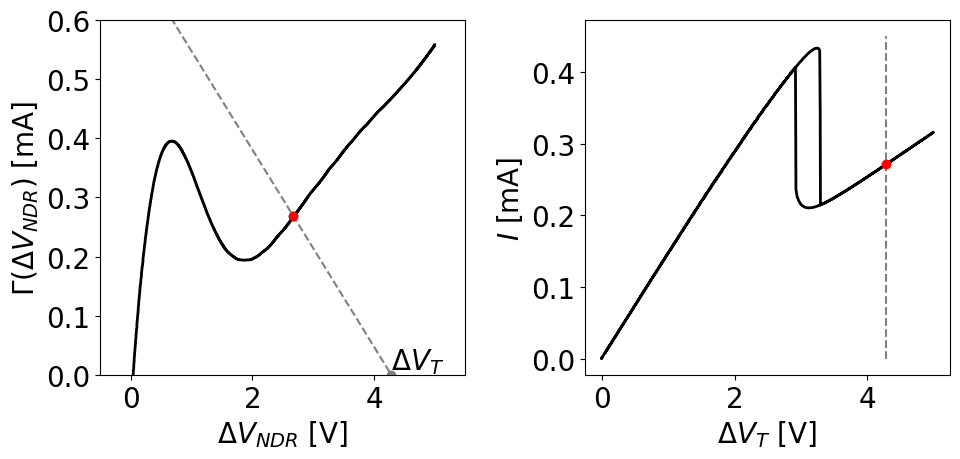

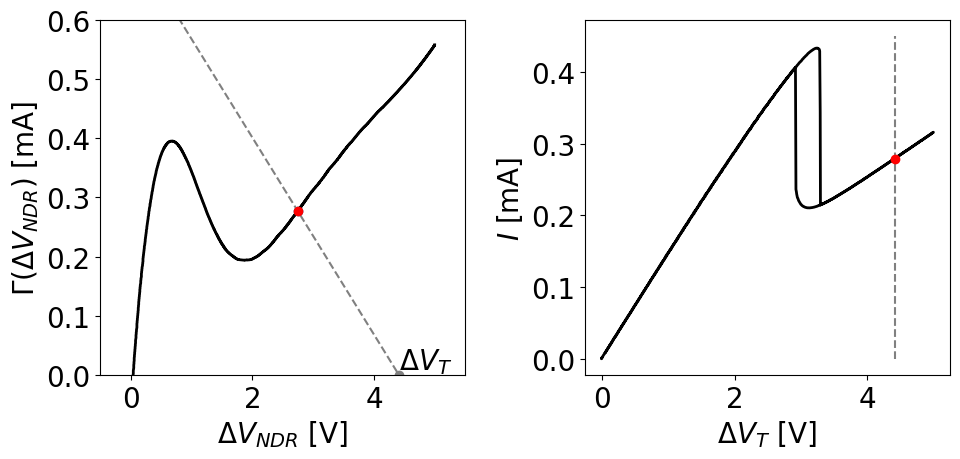

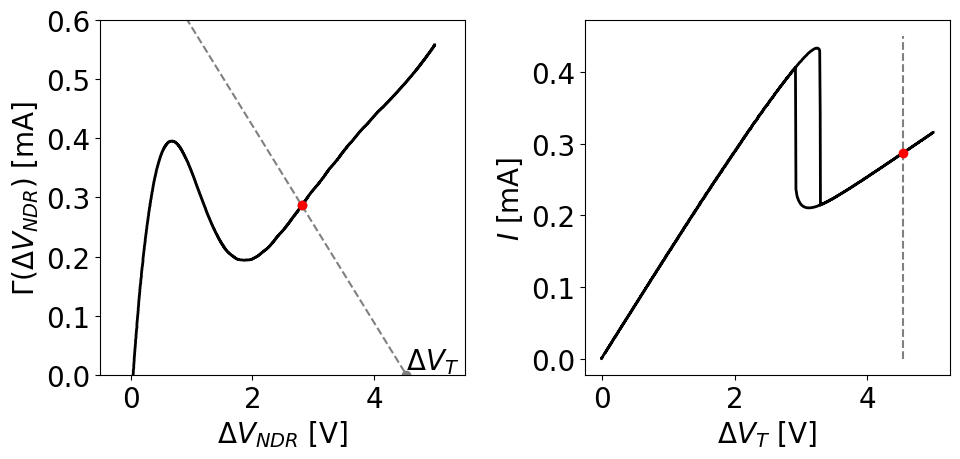

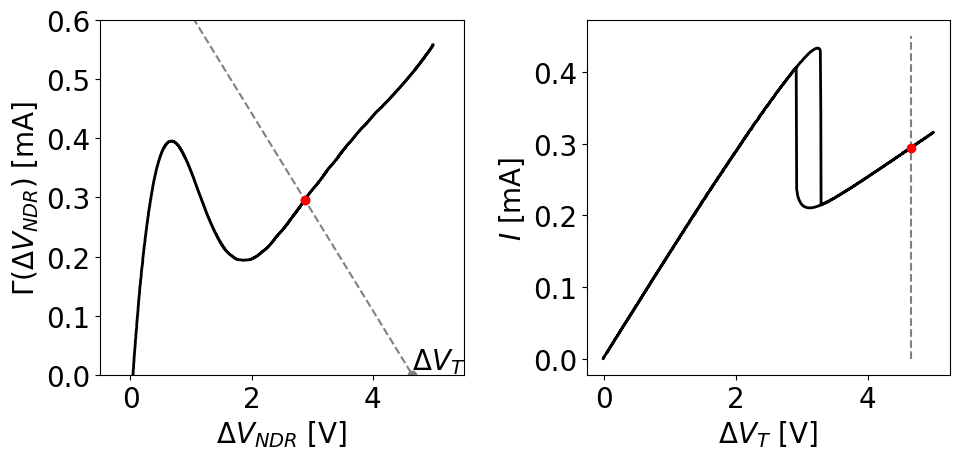

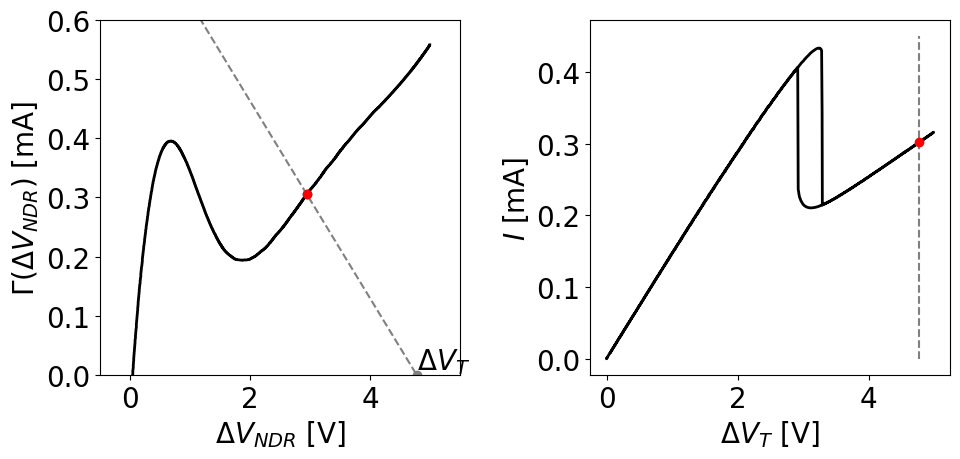

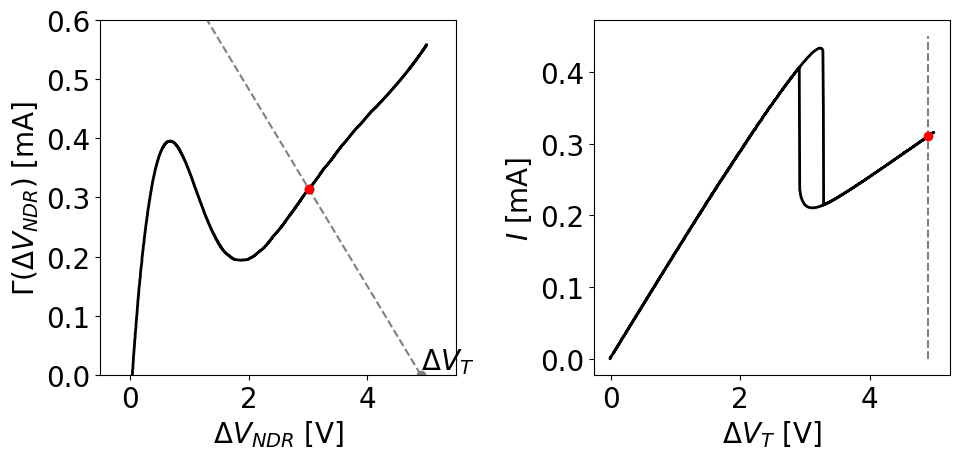

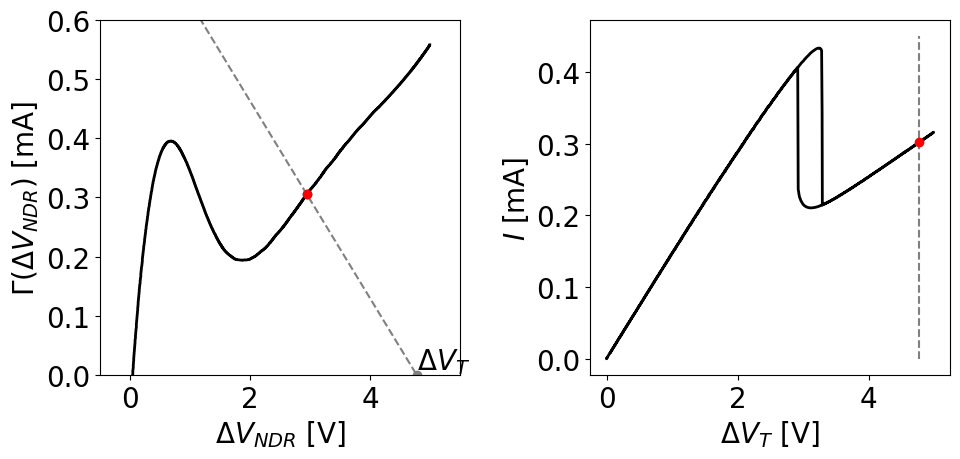

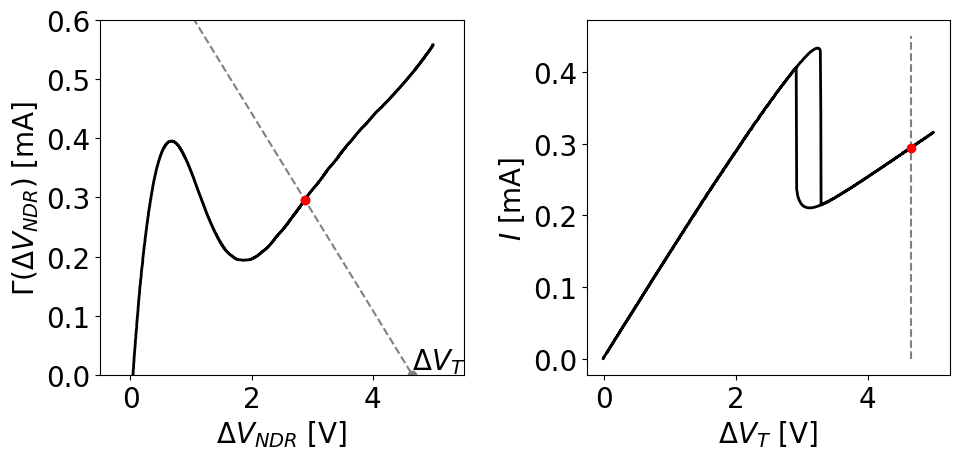

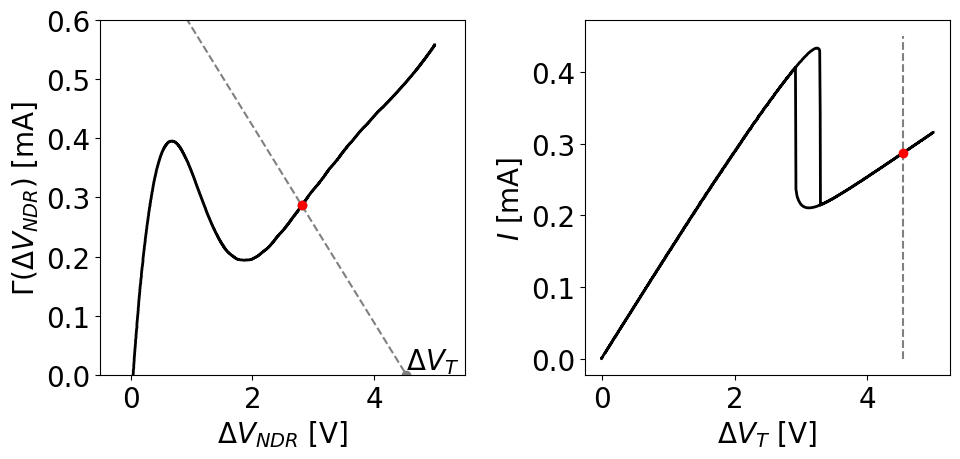

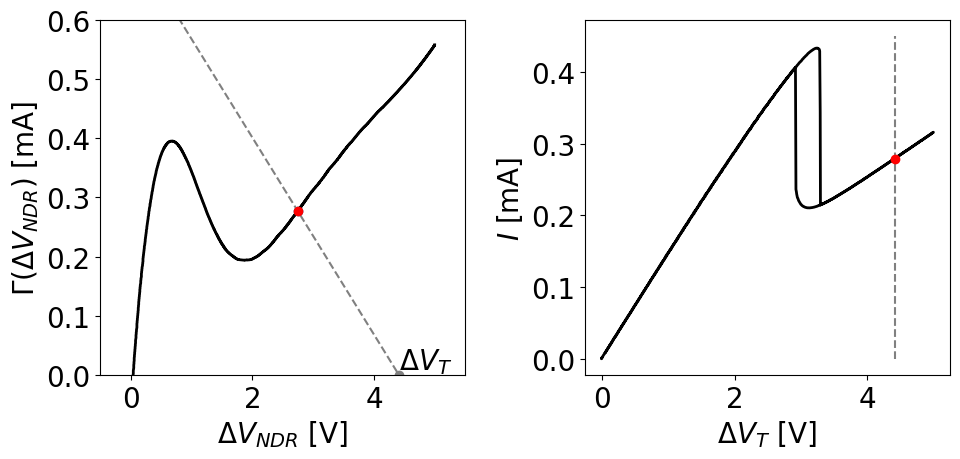

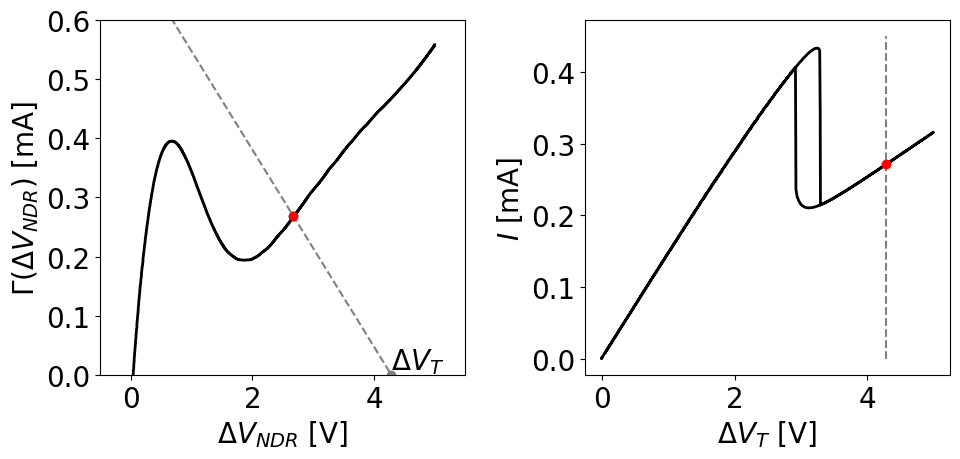

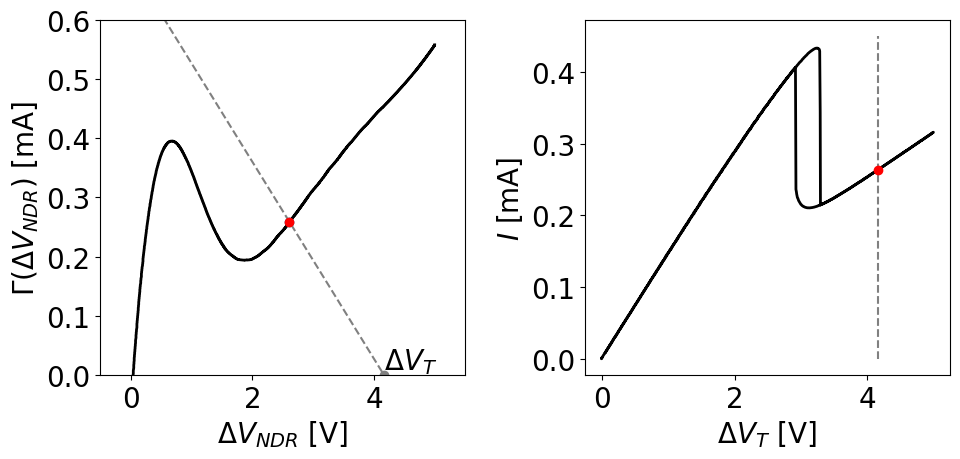

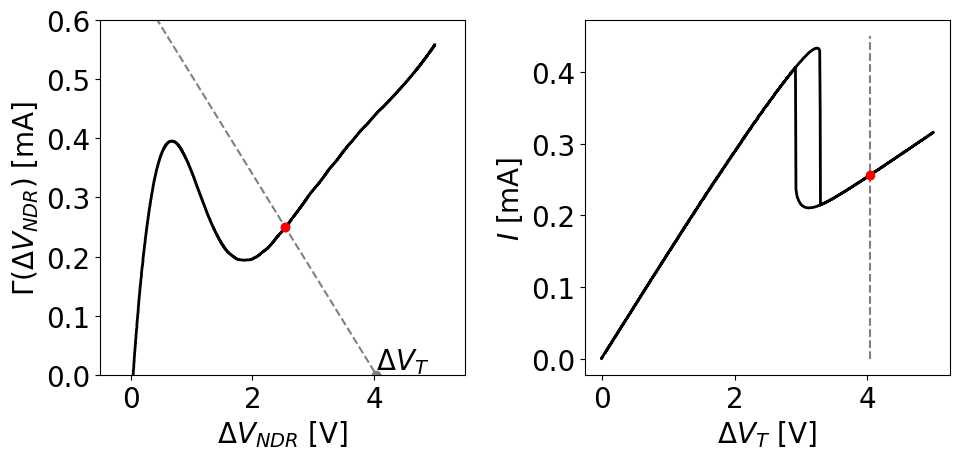

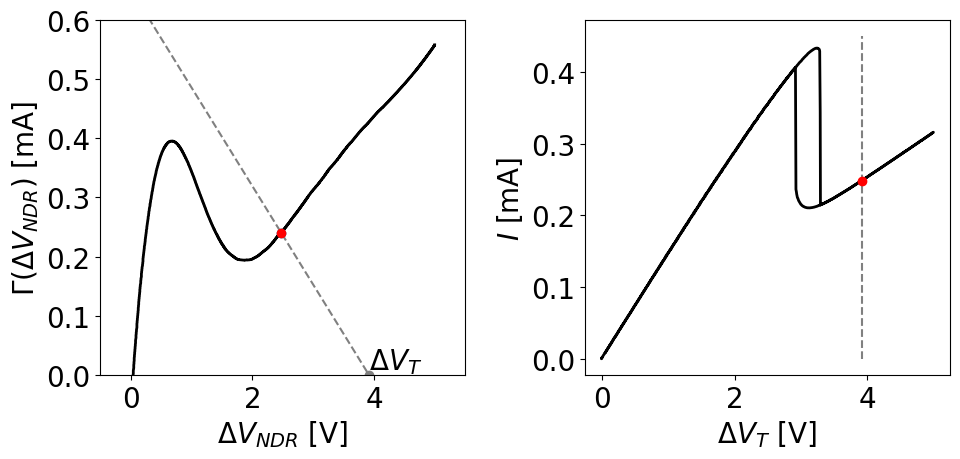

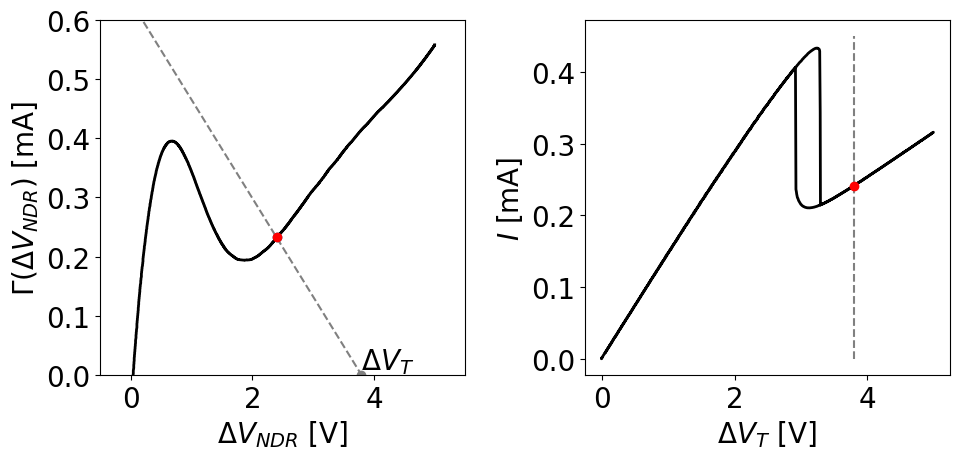

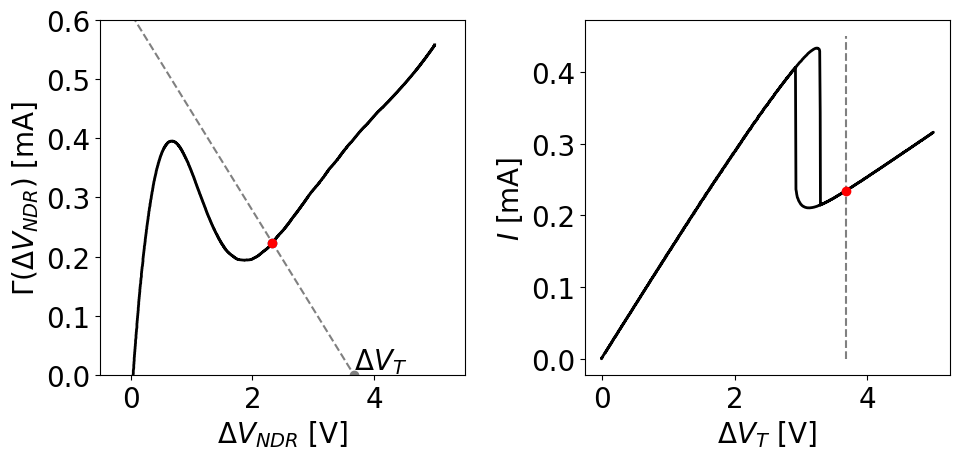

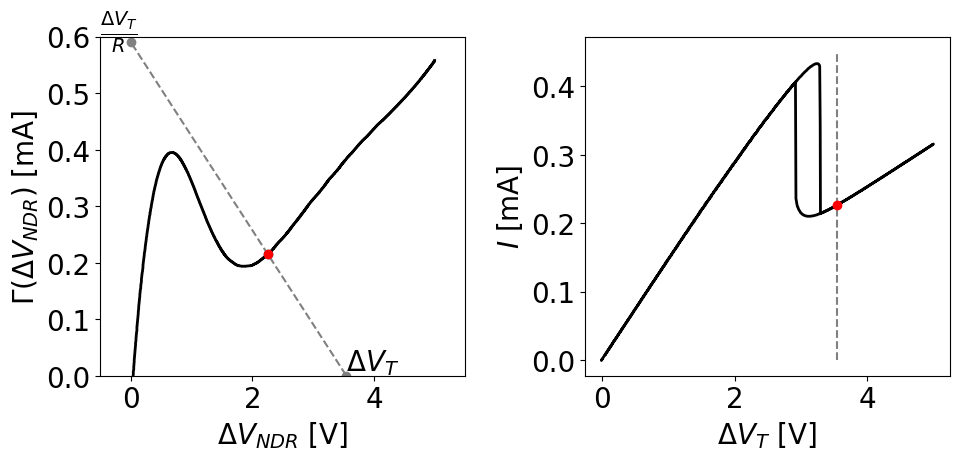

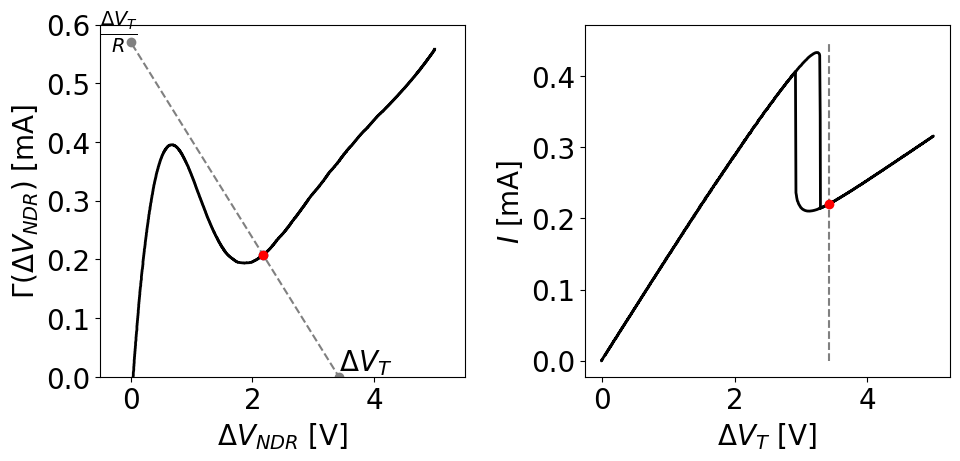

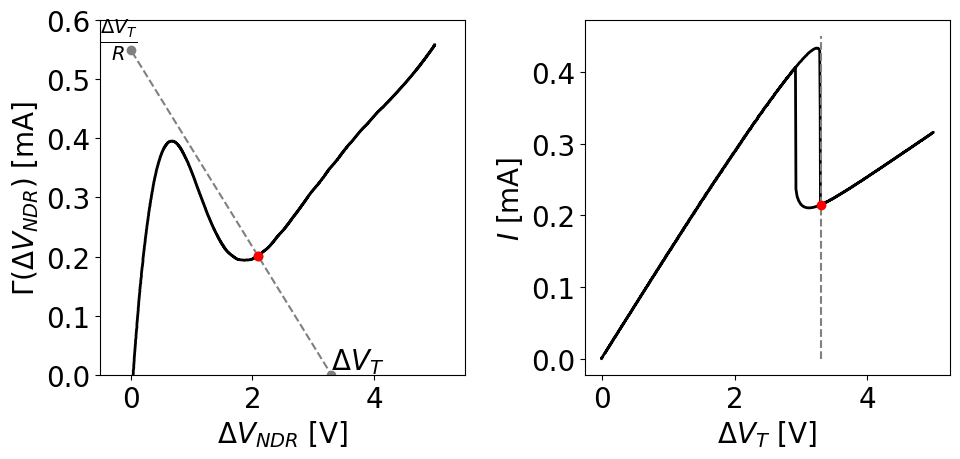

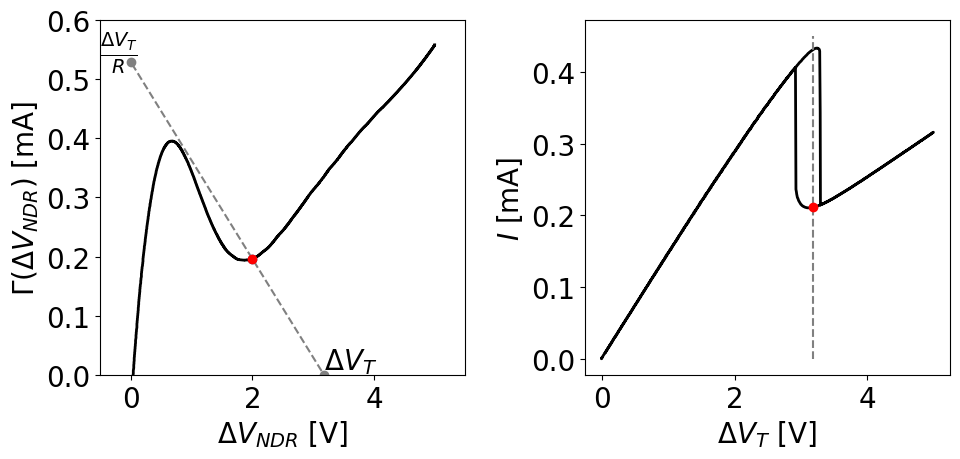

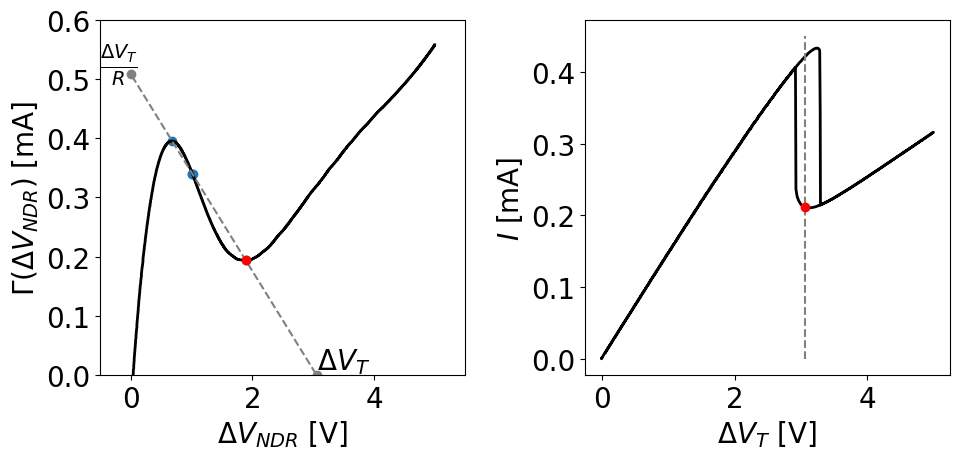

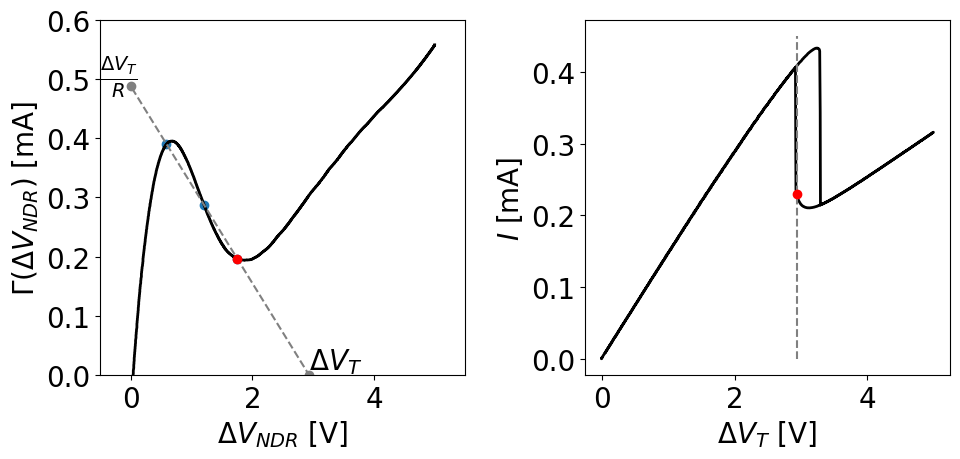

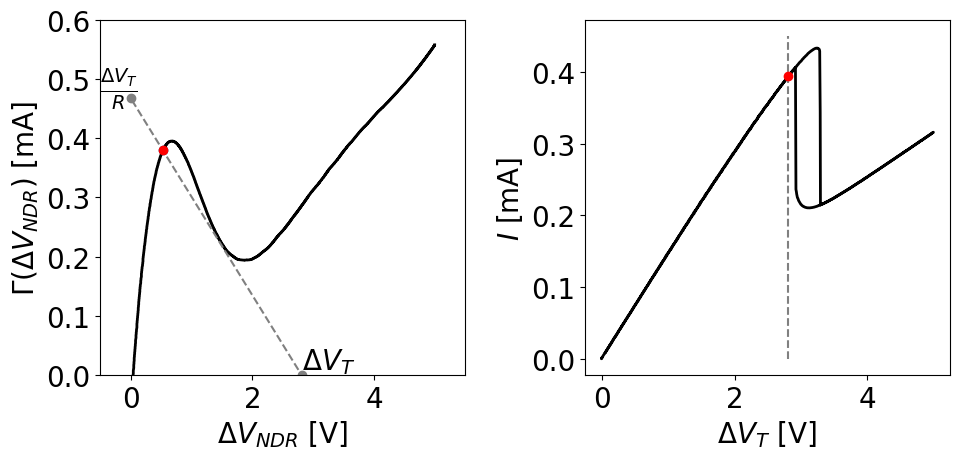

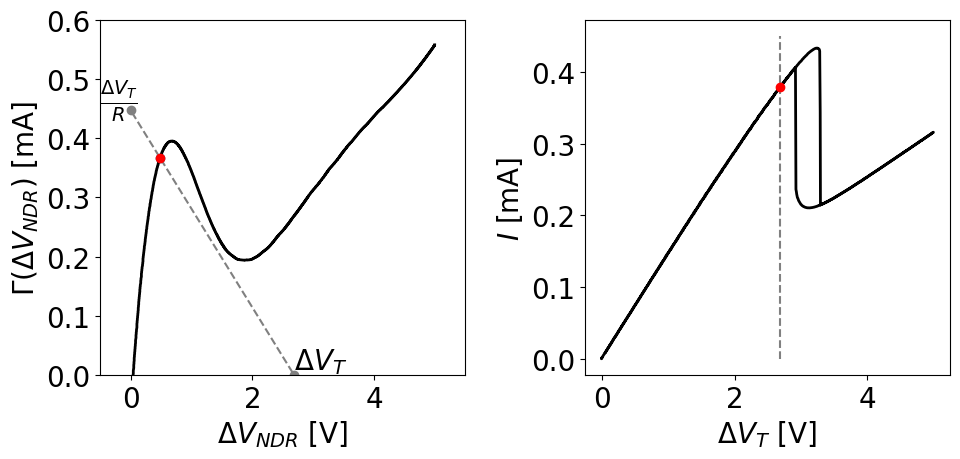

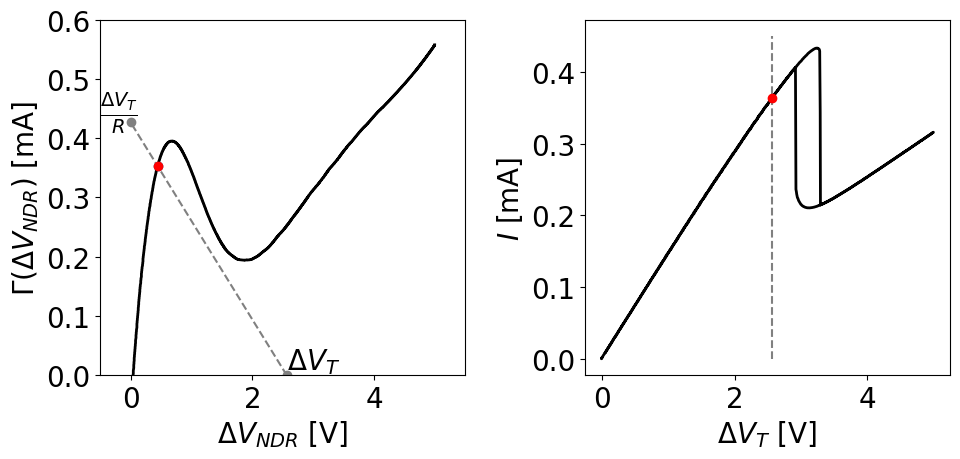

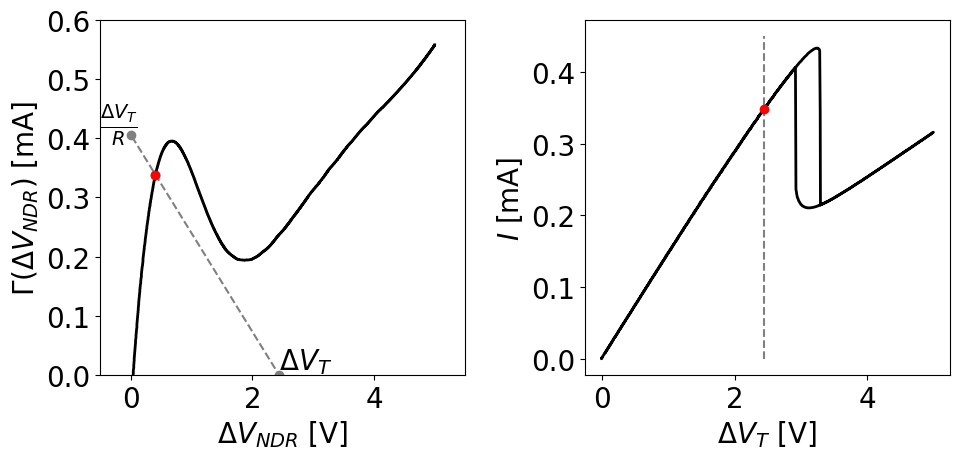

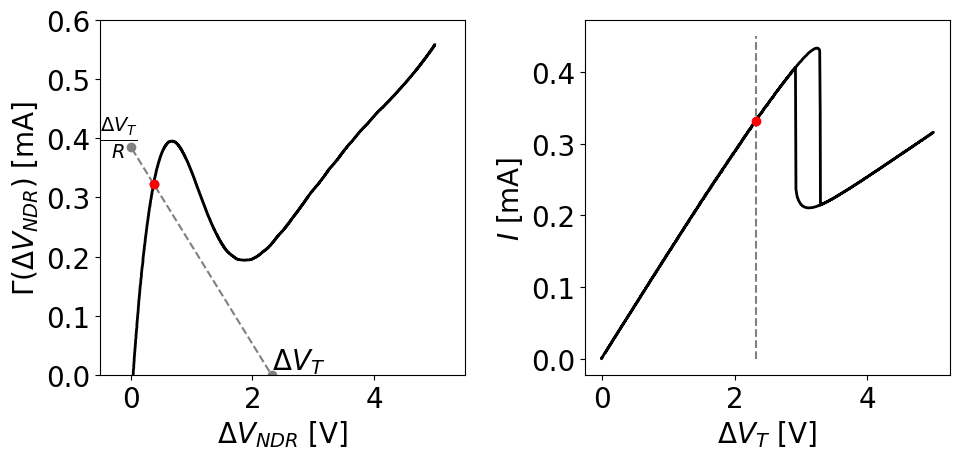

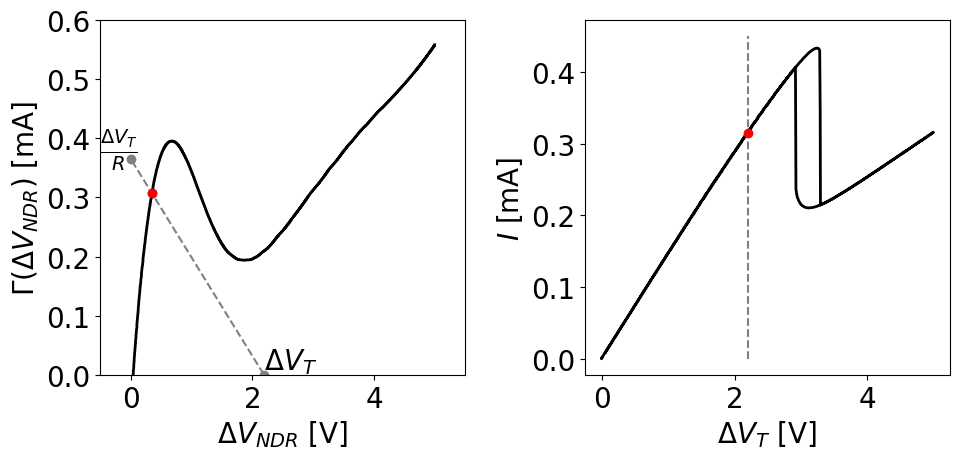

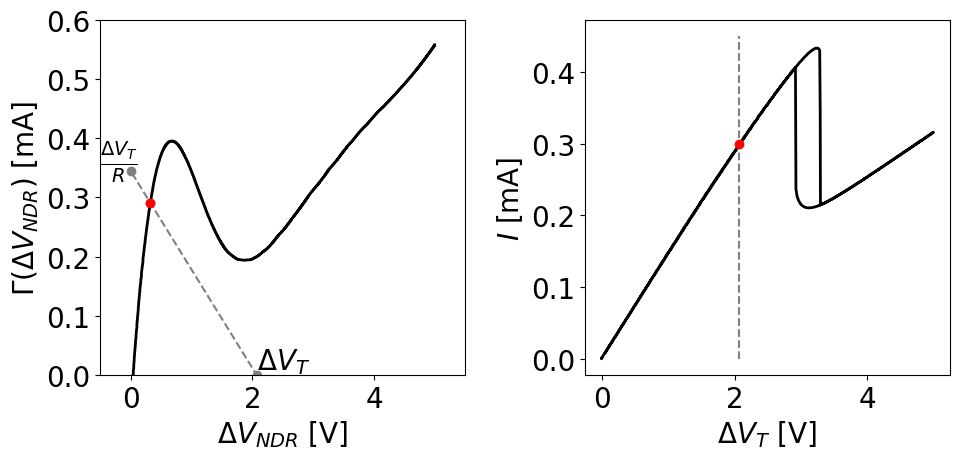

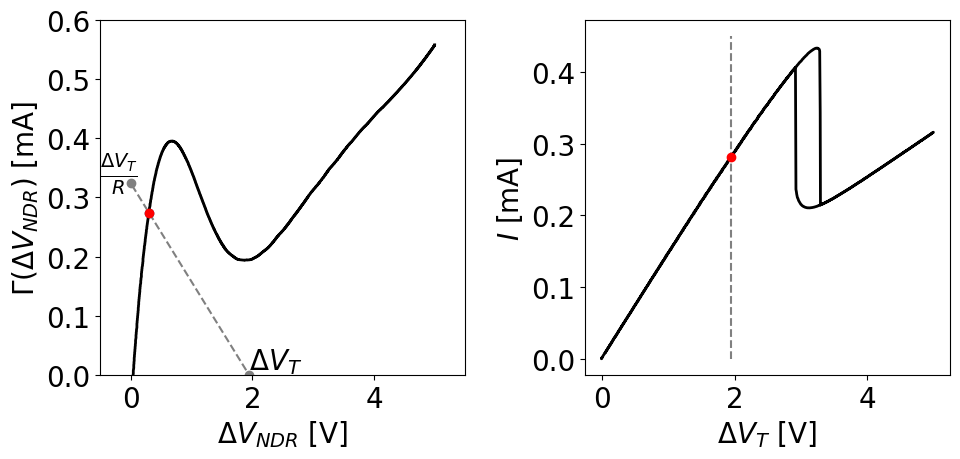

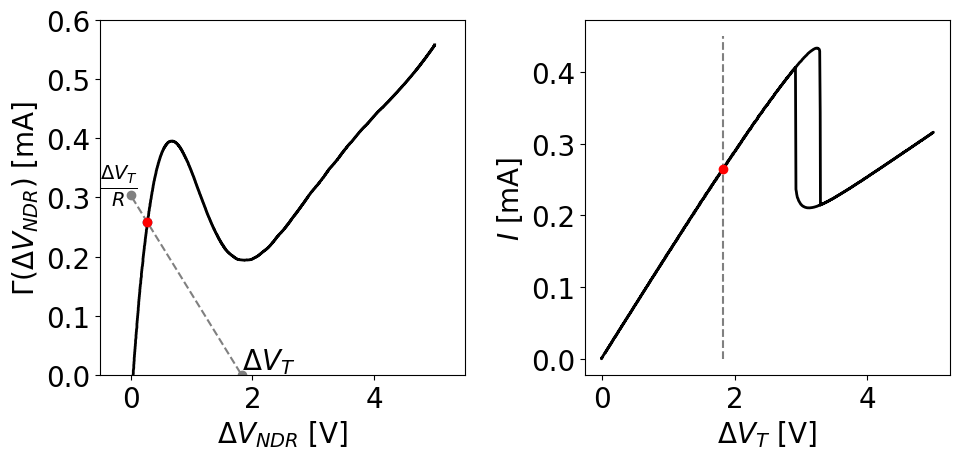

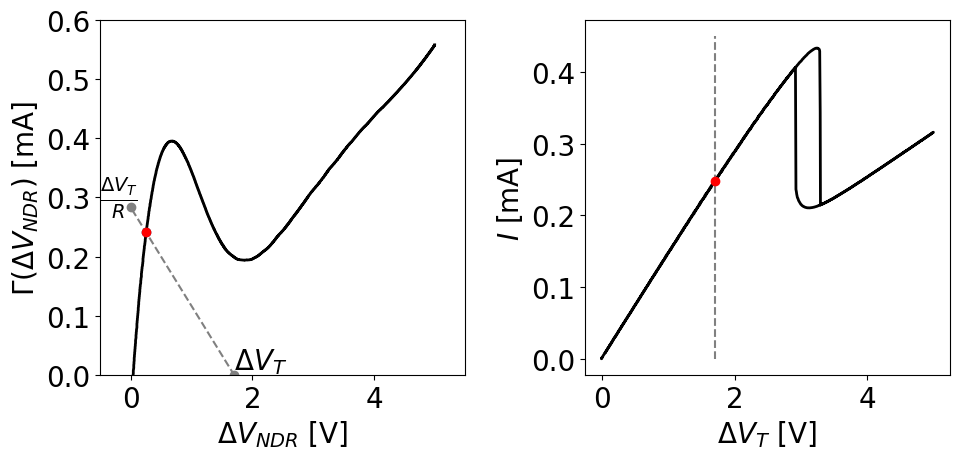

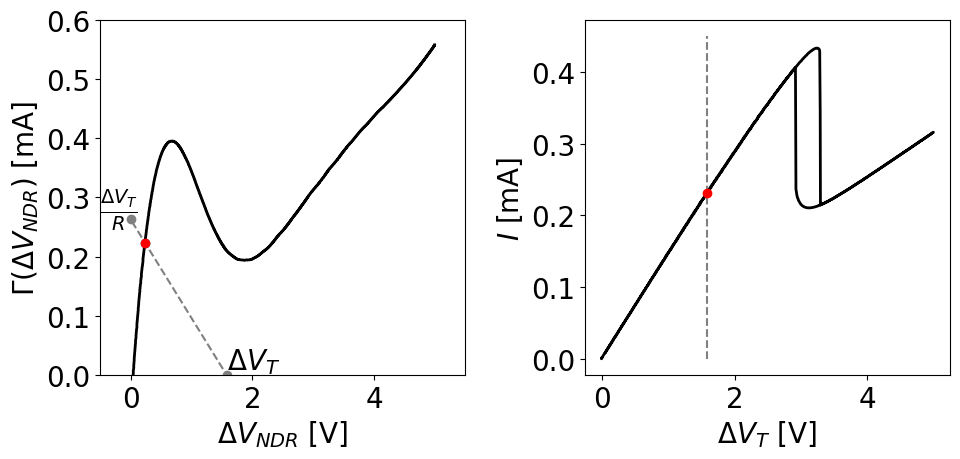

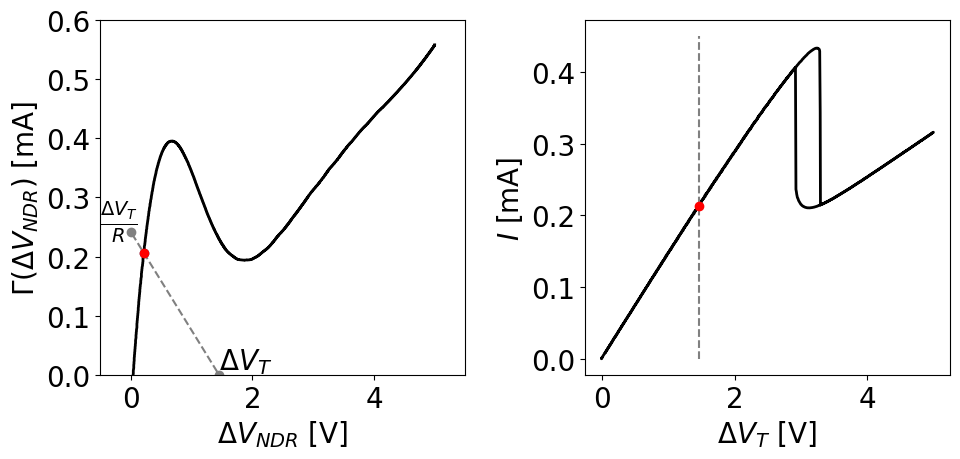

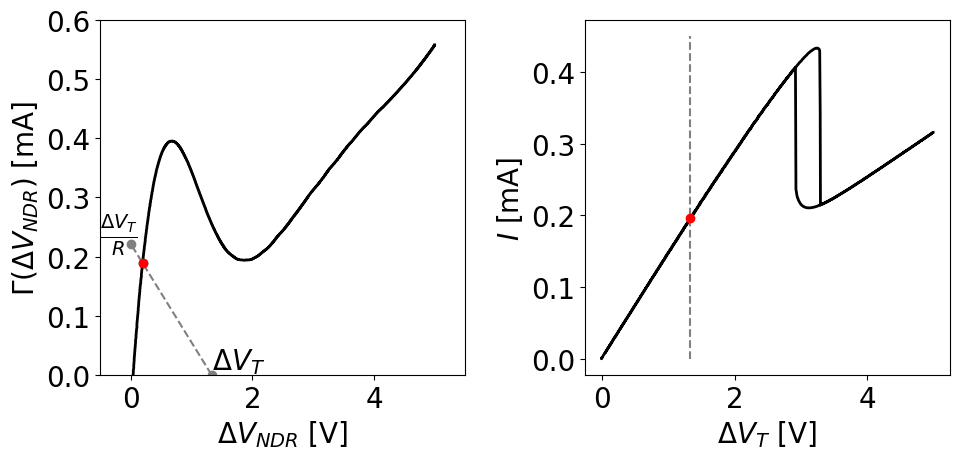

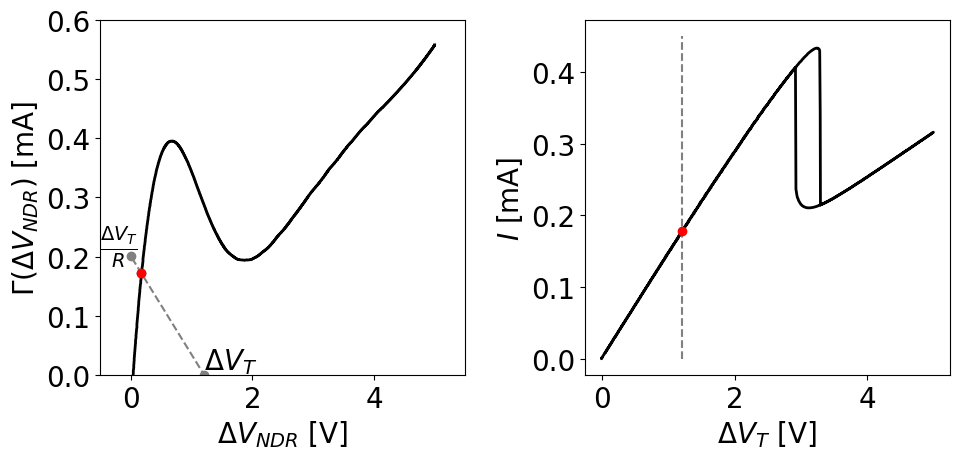

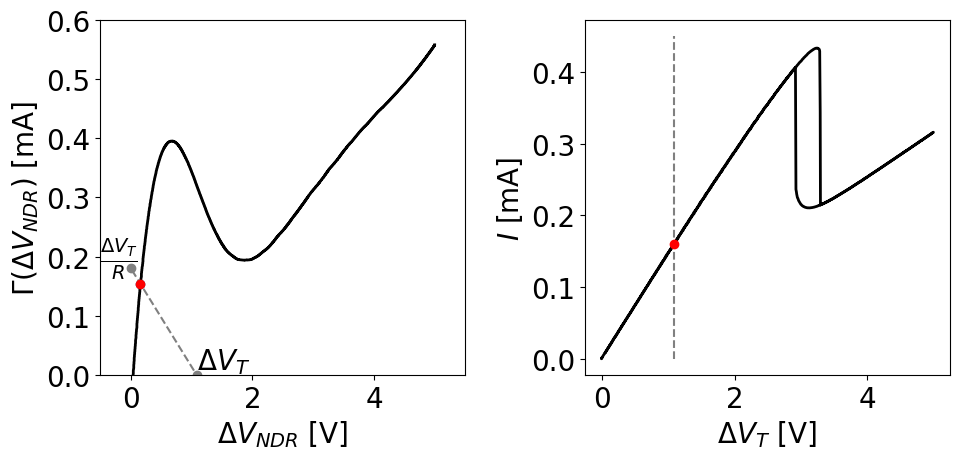

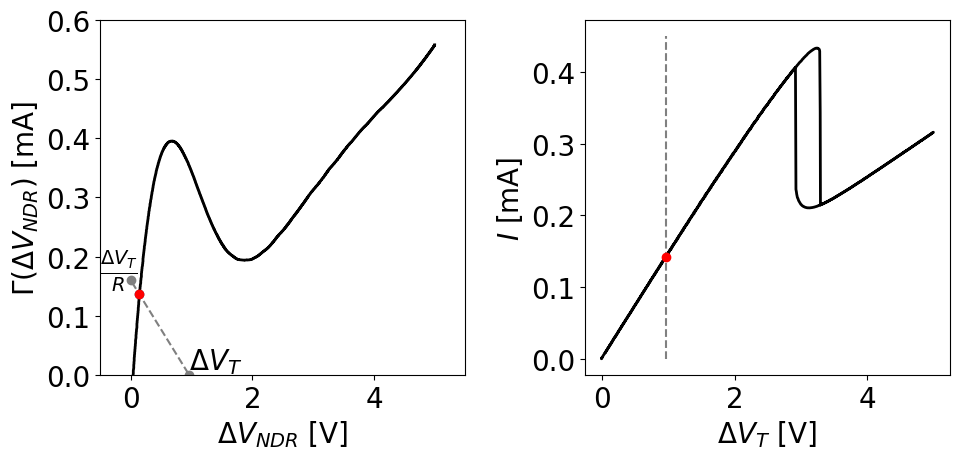

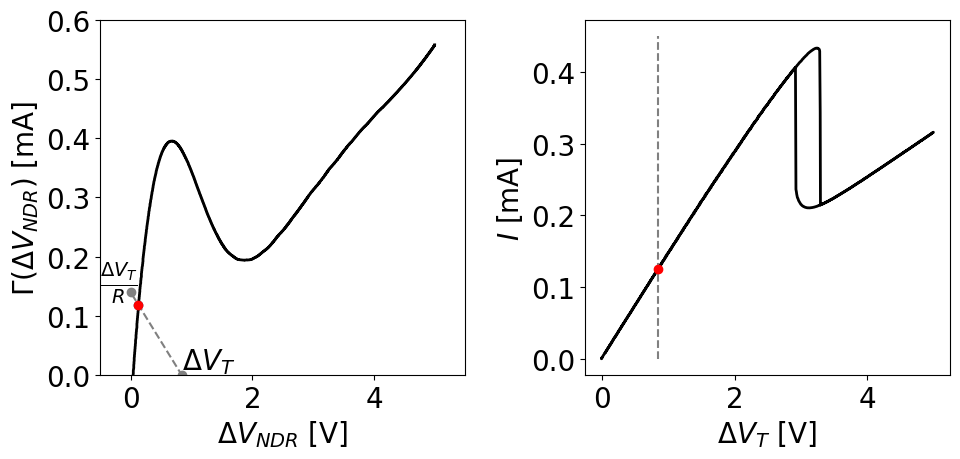

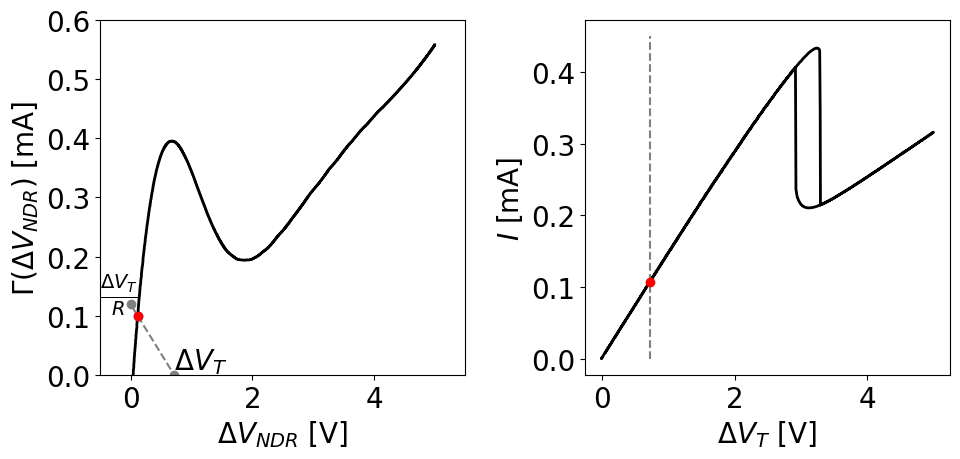

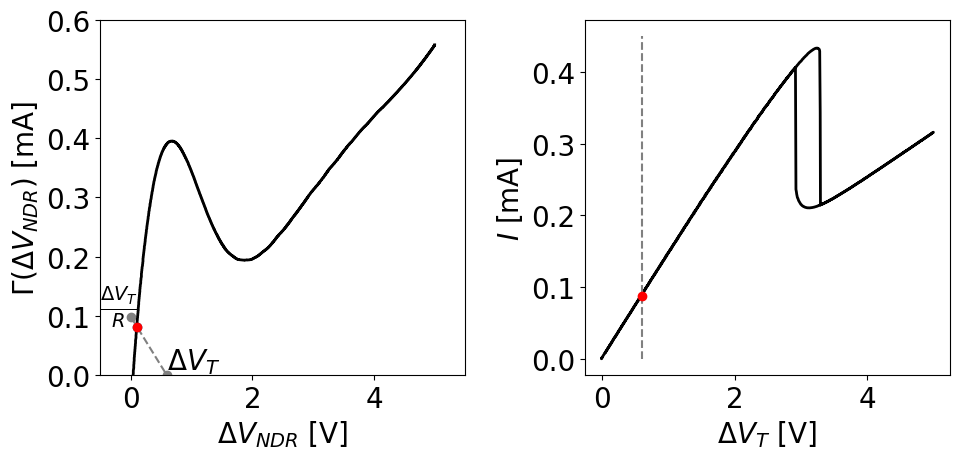

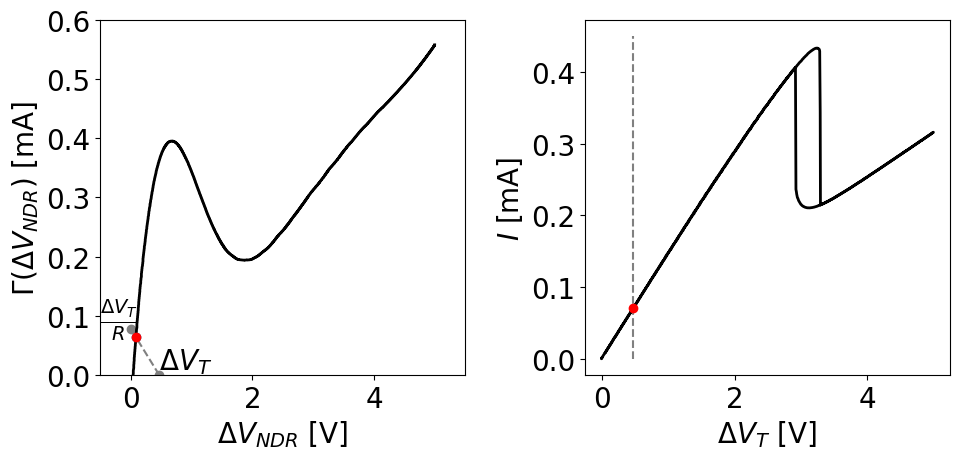

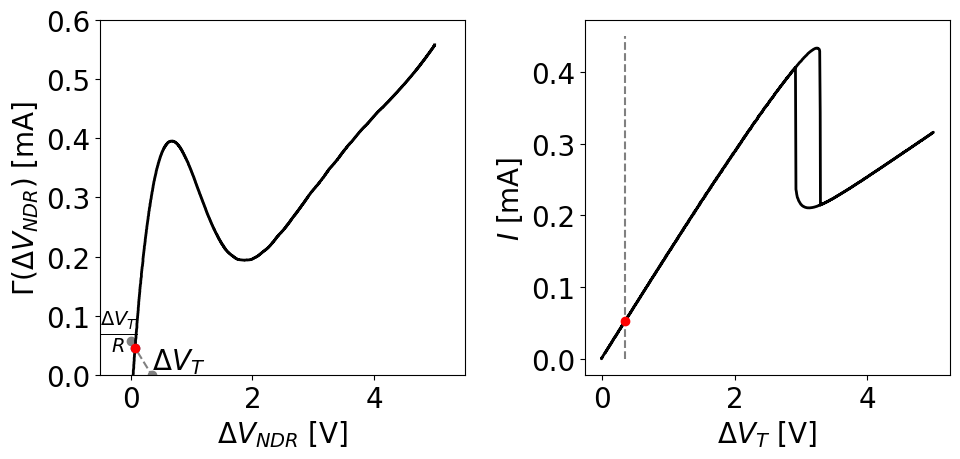

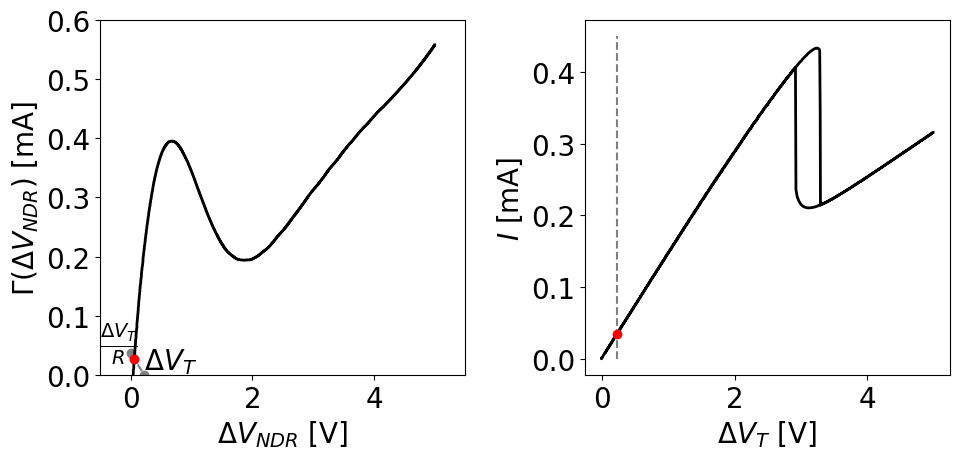

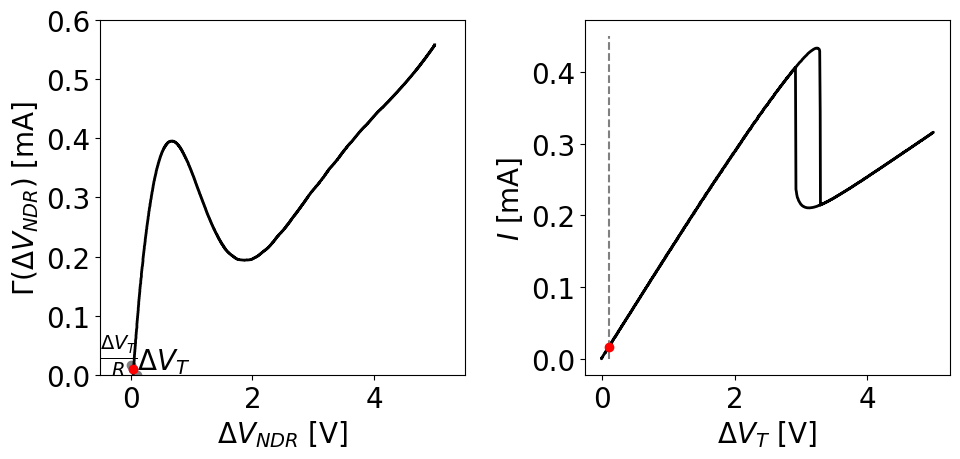

In [9]:
dV = np.linspace(0.1, 4.9, 40)

R0 = 3e3

# going up

counter = 0
filenameconv = 'figures/hysteresis_animation/new/{}.png'
for v in dV:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
#     fig.suptitle(r'$R = 3k\Omega$')
    ax1.set_ylim(0, 6e-1)
    ax1.set_xlim(-0.5, 5.5)
    x = np.array(V00)
    y1 = np.array((v-x)/(R0*2))*1e3
    y2 = np.array(Ihat)*1e3
    ax1.plot(V00, y2, c='k', linewidth=2)
#     ax1.plot(V00, I00*1e3, alpha=0.3)
    idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
    ax1.plot(x,y1, color='gray', linestyle='dashed')
    ax1.scatter([v], [0], c='gray')
    ax1.annotate(r'$\Delta V_T$', (v, 1e-2))
    ax1.scatter([0], [v/(R0*2)*1e3], c='gray')
    ax1.annotate(r'$\frac{\Delta V_T}{R}$', (-0.5,v/(2*R0)*1e3))
    if len(idx > 1):
        ax1.scatter(x[idx], y1[idx])
        trueidx = [np.min(idx)]
    else:
        trueidx = idx
    ax1.scatter(x[trueidx], y1[trueidx], c='r', zorder=3)

    ax1.set_xlabel(r'$\Delta V_{NDR}$ [V]')
    ax1.set_ylabel(r'$\Gamma (\Delta V_{NDR})$ [mA]')

    ax2.set_xlabel(r'$\Delta V_T$ [V]')
    ax2.set_ylabel(r'$I$ [mA]')
    ax2.plot(V0, I_LR, c='k', linewidth=2)
    idx2 = np.argwhere(np.diff(np.sign(V0- v)) != 0)
    I_true = np.max(np.array(I_LR)[idx2])
    ax2.vlines(v, 0, 4.5e-1, linestyle='dashed', color='gray')
    ax2.scatter([v], I_true, c='r', zorder=3)
    fig.tight_layout()
    fig.savefig(filenameconv.format(str(counter).zfill(4)))
    
    plt.show()
    counter+=1

# #going down 
for v in np.flip(dV)[1:]:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
#     fig.suptitle(r'$R = 3k\Omega$')
    ax1.set_ylim(0, 6e-1)
    ax1.set_xlim(-0.5, 5.5)
    x = np.array(V00)
    y1 = np.array((v-x)/(R0*2))*1e3
    y2 = np.array(Ihat)*1e3
    ax1.plot(V00, y2, c='k', linewidth=2)
#     ax1.plot(V00, I00*1e3, alpha=0.3)
    idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
    ax1.plot(x,y1, color='gray', linestyle='dashed')
    ax1.scatter([v], [0], c='gray')
    ax1.annotate(r'$\Delta V_T$', (v, 1e-2))
    ax1.scatter([0], [v/(R0*2)*1e3], c='gray')
    ax1.annotate(r'$\frac{\Delta V_T}{R}$', (-0.5,v/(2*R0)*1e3))
    if len(idx > 1):
        ax1.scatter(x[idx], y1[idx])
        trueidx = [np.max(idx)]
    else:
        trueidx = idx
    ax1.scatter(x[trueidx], y1[trueidx], c='r', zorder=3)

    ax1.set_xlabel(r'$\Delta V_{NDR}$ [V]')
    ax1.set_ylabel(r'$\Gamma (\Delta V_{NDR})$ [mA]')

    ax2.set_xlabel(r'$\Delta V_T$ [V]')
    ax2.set_ylabel(r'$I$ [mA]')
    ax2.plot(V0, I_LR, c='k', linewidth=2)
    idx2 = np.argwhere(np.diff(np.sign(V0- v)) != 0)
    I_true = np.min(np.array(I_LR)[idx2])
    ax2.vlines(v, 0, 4.5e-1, linestyle='dashed', color='gray')
    ax2.scatter([v], I_true, c='r', zorder=3)
    fig.tight_layout()
    fig.savefig(filenameconv.format(str(counter).zfill(4)))
    
    plt.show()
    counter+=1

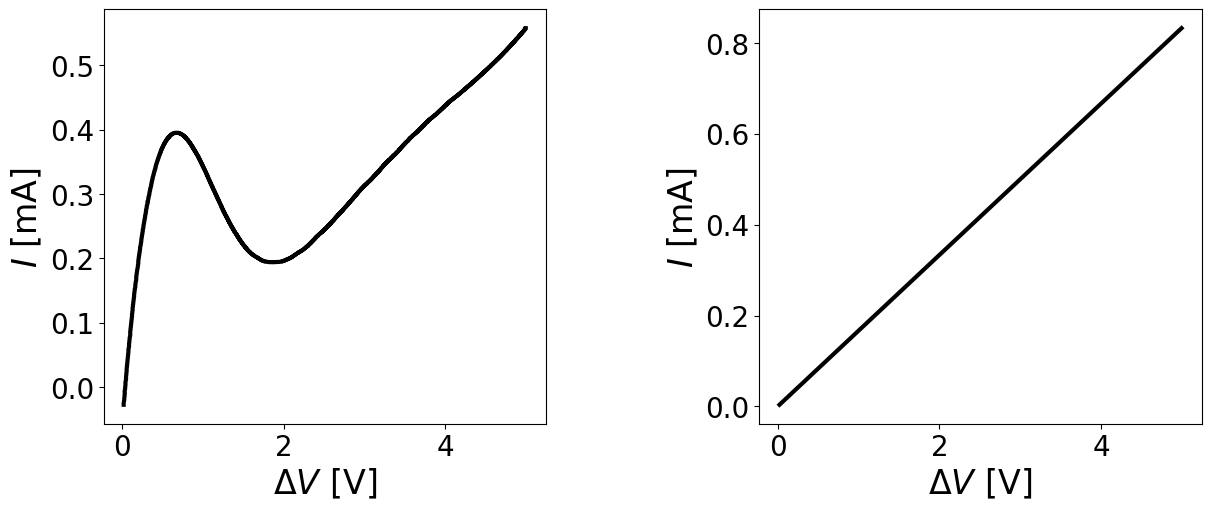

In [6]:
R0 = 6e3

fig, (ax2, ax1) = plt.subplots(1,2, figsize=(12,5), constrained_layout=True, gridspec_kw={'wspace': 0.2})
ax1.plot(V00, V00/R0*1e3, c='k', linewidth=3)
ax2.plot(V00, Ihat*1e3, color='k',linewidth=3)
# ax1.set_ylim(-0.05, 0.6)
# ax1.set_xlim(-0.1, 4.1)

ax1.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax2.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax1.set_ylabel(r'$I$ [mA]', fontsize=24)
ax2.set_ylabel(r'$I$ [mA]', fontsize=24)
# fig.tight_layout()
fig.savefig('figures/geometric_construction_IVcurves.png')

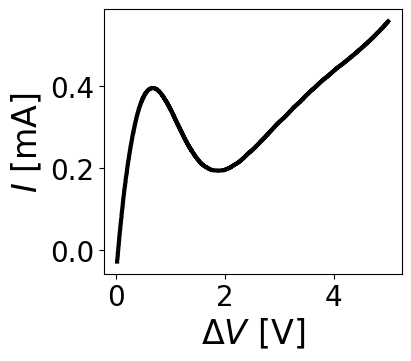

In [7]:
R0 = 6e3

fig, (ax2) = plt.subplots(figsize=(4,3.5), constrained_layout=True, gridspec_kw={'wspace': 0.2})
ax1.plot(V00, V00/R0*1e3, c='k', linewidth=3)
ax2.plot(V00, Ihat*1e3, color='k',linewidth=3)
# ax1.set_ylim(-0.05, 0.6)
# ax1.set_xlim(-0.1, 4.1)

ax1.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax2.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax1.set_ylabel(r'$I$ [mA]', fontsize=24)
ax2.set_ylabel(r'$I$ [mA]', fontsize=24)
# fig.tight_layout()
fig.savefig('figures/geometric_construction_NDR_IVcurve.png')

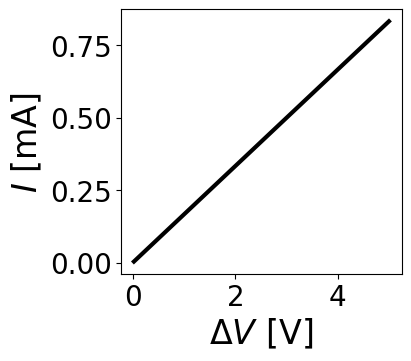

In [8]:
R0 = 6e3

fig, (ax1) = plt.subplots(figsize=(4,3.5), constrained_layout=True, gridspec_kw={'wspace': 0.2})
ax1.plot(V00, V00/R0*1e3, c='k', linewidth=3)
ax2.plot(V00, Ihat*1e3, color='k',linewidth=3)
# ax1.set_ylim(-0.05, 0.6)
# ax1.set_xlim(-0.1, 4.1)

ax1.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax2.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax1.set_ylabel(r'$I$ [mA]', fontsize=24)
ax2.set_ylabel(r'$I$ [mA]', fontsize=24)
# fig.tight_layout()
fig.savefig('figures/geometric_construction_LR_IVcurve.png')

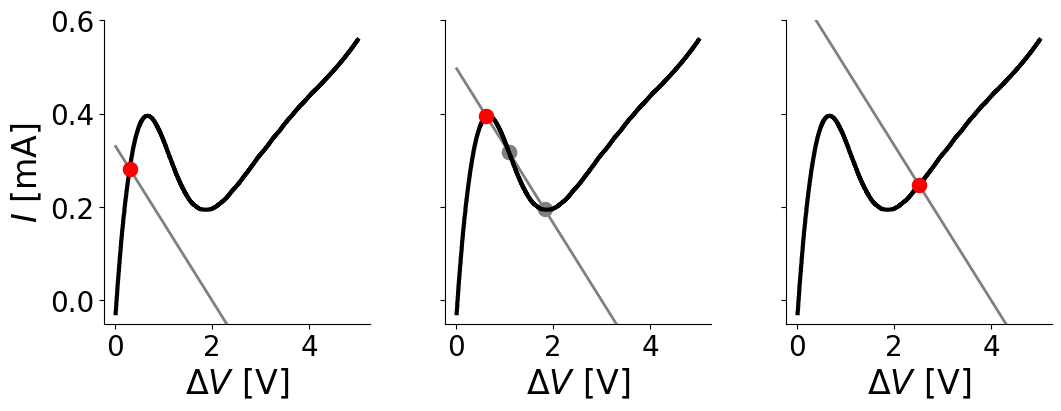

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10.5,4), constrained_layout=True,
                                    gridspec_kw={'wspace': 0.2}, sharex=True, sharey=True)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

ax1.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax2.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax1.set_ylabel(r'$I$ [mA]', fontsize=24)
# ax2.set_ylabel(r'$I$ [mA]', fontsize=24)
ax3.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
# ax3.set_ylabel(r'$I$ [mA]', fontsize=24)
ax1.set_ylim(-0.05, 0.6)
# ax1.set_xlim(-0.1, 4.1)

ax1.plot(V00, Ihat*1e3, c='k', linewidth=3, zorder=2)
ax2.plot(V00, Ihat*1e3, color='k',linewidth=3, zorder=2)
ax3.plot(V00, Ihat*1e3, color='k',linewidth=3, zorder=2)

v1=2
x = np.array(V00)
y1 = np.array((v1-x)/(R0))*1e3
y2 = np.array(Ihat)*1e3
idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
ax1.plot(x,y1, color='gray', linewidth=2, zorder=0)
# ax1.scatter([v1], [0], c='gray')
# ax1.annotate(r'$V_0$', (v, 5e-6))
# ax1.scatter([0], [v1/(R0)*1e3], c='gray')
if len(idx > 1):
        ax1.scatter(x[idx], y1[idx], c='gray', s=100)
        trueidx = [np.min(idx)]
else:
    trueidx = idx
ax1.scatter(x[trueidx], y1[trueidx], c='r', zorder=3, s=100)

v2=3
x = np.array(V00)
y1 = np.array((v2-x)/(R0))*1e3
y2 = np.array(Ihat)*1e3
idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
ax2.plot(x,y1, color='gray', linewidth=2, zorder=0)
# ax2.scatter([v2], [0], c='gray')
# ax2.annotate(r'$V_0$', (v, 5e-6))
# ax2.scatter([0], [v2/(R0)*1e3], c='gray')
if len(idx > 1):
        ax2.scatter(x[idx], y1[idx], c='gray', s=100)
        trueidx = [np.min(idx)]
else:
    trueidx = idx
ax2.scatter(x[trueidx], y1[trueidx], c='r', zorder=3, s=100)

v3=4
x = np.array(V00)
y1 = np.array((v3-x)/(R0))*1e3
y2 = np.array(Ihat)*1e3
idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
ax3.plot(x,y1, color='gray', linewidth=2, zorder=0)
# ax2.scatter([v2], [0], c='gray')
# ax2.annotate(r'$V_0$', (v, 5e-6))
# ax2.scatter([0], [v2/(R0)*1e3], c='gray')
if len(idx > 1):
        ax3.scatter(x[idx], y1[idx], c='gray', s=100)
        trueidx = [np.min(idx)]
else:
    trueidx = idx
ax3.scatter(x[trueidx], y1[trueidx], c='r', zorder=3, s=100)


# fig.constrained_layout()
fig.savefig('figures/geometric_construction_3progression.png')

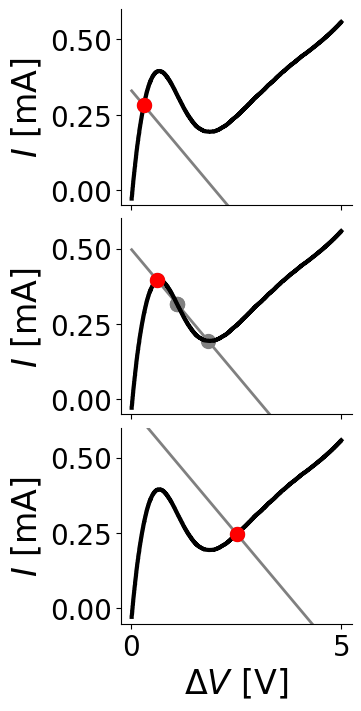

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(3.5 , 7), constrained_layout=True,
                                    gridspec_kw={'wspace': 0.2}, sharex=True, sharey=True)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

# ax1.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
# ax2.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax1.set_ylabel(r'$I$ [mA]', fontsize=24)
ax2.set_ylabel(r'$I$ [mA]', fontsize=24)
ax3.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax3.set_ylabel(r'$I$ [mA]', fontsize=24)
ax1.set_ylim(-0.05, 0.6)
# ax1.set_xlim(-0.1, 4.1)

ax1.plot(V00, Ihat*1e3, c='k', linewidth=3, zorder=2)
ax2.plot(V00, Ihat*1e3, color='k',linewidth=3, zorder=2)
ax3.plot(V00, Ihat*1e3, color='k',linewidth=3, zorder=2)

v1=2
x = np.array(V00)
y1 = np.array((v1-x)/(R0))*1e3
y2 = np.array(Ihat)*1e3
idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
ax1.plot(x,y1, color='gray', linewidth=2, zorder=0)
# ax1.scatter([v1], [0], c='gray')
# ax1.annotate(r'$V_0$', (v, 5e-6))
# ax1.scatter([0], [v1/(R0)*1e3], c='gray')
if len(idx > 1):
        ax1.scatter(x[idx], y1[idx], c='gray', s=100)
        trueidx = [np.min(idx)]
else:
    trueidx = idx
ax1.scatter(x[trueidx], y1[trueidx], c='r', zorder=3, s=100)

v2=3
x = np.array(V00)
y1 = np.array((v2-x)/(R0))*1e3
y2 = np.array(Ihat)*1e3
idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
ax2.plot(x,y1, color='gray', linewidth=2, zorder=0)
# ax2.scatter([v2], [0], c='gray')
# ax2.annotate(r'$V_0$', (v, 5e-6))
# ax2.scatter([0], [v2/(R0)*1e3], c='gray')
if len(idx > 1):
        ax2.scatter(x[idx], y1[idx], c='gray', s=100)
        trueidx = [np.min(idx)]
else:
    trueidx = idx
ax2.scatter(x[trueidx], y1[trueidx], c='r', zorder=3, s=100)

v3=4
x = np.array(V00)
y1 = np.array((v3-x)/(R0))*1e3
y2 = np.array(Ihat)*1e3
idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
ax3.plot(x,y1, color='gray', linewidth=2, zorder=0)
# ax2.scatter([v2], [0], c='gray')
# ax2.annotate(r'$V_0$', (v, 5e-6))
# ax2.scatter([0], [v2/(R0)*1e3], c='gray')
if len(idx > 1):
        ax3.scatter(x[idx], y1[idx], c='gray', s=100)
        trueidx = [np.min(idx)]
else:
    trueidx = idx
ax3.scatter(x[trueidx], y1[trueidx], c='r', zorder=3, s=100)

# fig.tight_layout()
# # fig.constrained_layout()
# ax3.set_xticks([0, v3])
# ax3.set_

# fig.savefig('figures/geometric_construction_3progression_vert.png', bbox_inches = "tight")

/var/folders/l6/wx01b0x94cb_yjklswj95db00000gn/T/ipykernel_46467/2342717297.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


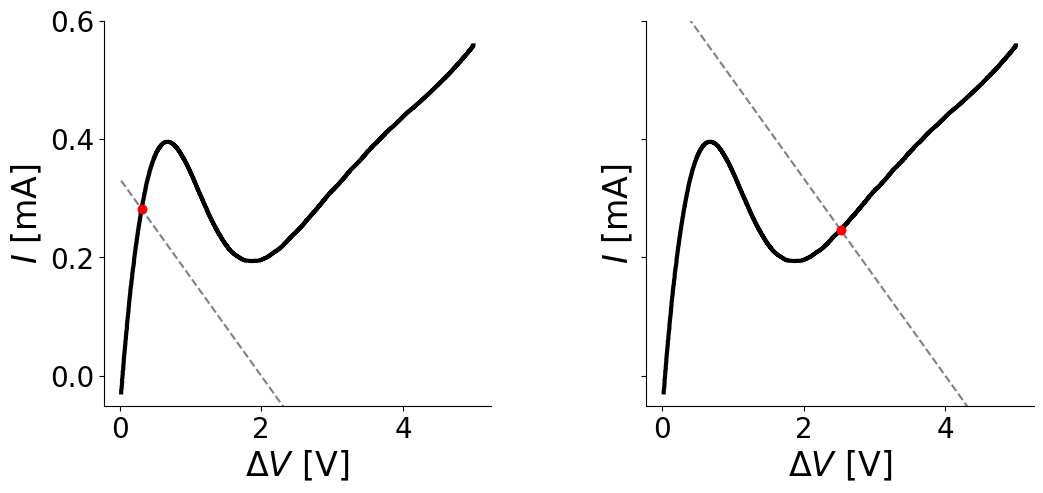

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), gridspec_kw={'wspace': 0.4}, sharex=True, sharey=True)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

ax1.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax2.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
ax1.set_ylabel(r'$I$ [mA]', fontsize=24)
ax2.set_ylabel(r'$I$ [mA]', fontsize=24)
ax3.set_xlabel(r'$\Delta V$ [V]', fontsize=24)
# ax3.set_ylabel(r'$I$ [mA]', fontsize=24)
ax1.set_ylim(-0.05, 0.6)
# ax1.set_xlim(-0.1, 4.1)

ax1.plot(V00, Ihat*1e3, c='k', linewidth=3)
ax2.plot(V00, Ihat*1e3, color='k',linewidth=3)
ax3.plot(V00, Ihat*1e3, color='k',linewidth=3)

v1=2
x = np.array(V00)
y1 = np.array((v1-x)/(R0))*1e3
y2 = np.array(Ihat)*1e3
idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
ax1.plot(x,y1, color='gray', linestyle='dashed')
# ax1.scatter([v1], [0], c='gray')
# ax1.annotate(r'$V_0$', (v, 5e-6))
# ax1.scatter([0], [v1/(R0)*1e3], c='gray')
if len(idx > 1):
        ax1.scatter(x[idx], y1[idx], c='gray')
        trueidx = [np.min(idx)]
else:
    trueidx = idx
ax1.scatter(x[trueidx], y1[trueidx], c='r', zorder=3)

v2=4
x = np.array(V00)
y1 = np.array((v2-x)/(R0))*1e3
y2 = np.array(Ihat)*1e3
idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
ax2.plot(x,y1, color='gray', linestyle='dashed')
# ax2.scatter([v2], [0], c='gray')
# ax2.annotate(r'$V_0$', (v, 5e-6))
# ax2.scatter([0], [v2/(R0)*1e3], c='gray')
if len(idx > 1):
        ax2.scatter(x[idx], y1[idx], c='gray')
        trueidx = [np.min(idx)]
else:
    trueidx = idx
ax2.scatter(x[trueidx], y1[trueidx], c='r', zorder=3)

# v3=4
# x = np.array(V00)
# y1 = np.array((v3-x)/(R0))*1e3
# y2 = np.array(Ihat)*1e3
# idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
# ax3.plot(x,y1, color='gray', linestyle='dashed')
# # ax2.scatter([v2], [0], c='gray')
# # ax2.annotate(r'$V_0$', (v, 5e-6))
# # ax2.scatter([0], [v2/(R0)*1e3], c='gray')
# if len(idx > 1):
#         ax3.scatter(x[idx], y1[idx], c='gray')
#         trueidx = [np.min(idx)]
# else:
#     trueidx = idx
# ax3.scatter(x[trueidx], y1[trueidx], c='r', zorder=3)


fig.tight_layout()

In [12]:
df = pd.read_csv('data/sequences/3NDR/V0scan_updown.csv')

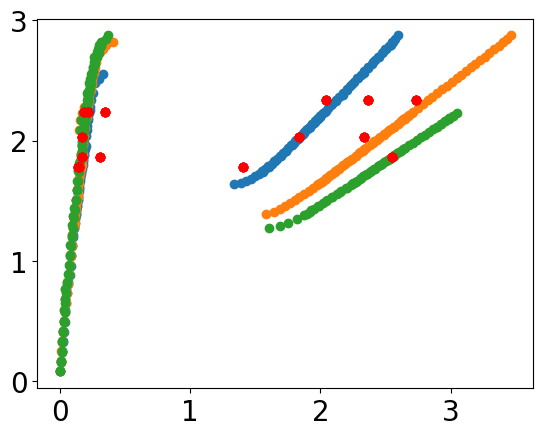

In [13]:
idx = [34, 61, 93, 150, 169]
# idx = [169]
plt.scatter(df.V1, df.Vr)
plt.scatter(df.V2, df.Vr)
plt.scatter(df.V3, df.Vr)
for i in idx:
    plt.scatter(df.iloc[idx].V1, df.iloc[idx].Vr, c='r')
    plt.scatter(df.iloc[idx].V2, df.iloc[idx].Vr, c='r')
    plt.scatter(df.iloc[idx].V3, df.iloc[idx].Vr, c='r')
    
df= df.drop(idx)

In [14]:
point = df.iloc[110]

R0 = df.iloc[0].R0/1000
V1 = df.sort_values(by=['V1']).V1
V2 = df.sort_values(by=['V2']).V2
V3 = df.sort_values(by=['V3']).V3
I1 = df.sort_values(by=['V1']).Vr/R0
I2 = df.sort_values(by=['V2']).Vr/R0
I3 = df.sort_values(by=['V3']).Vr/R0

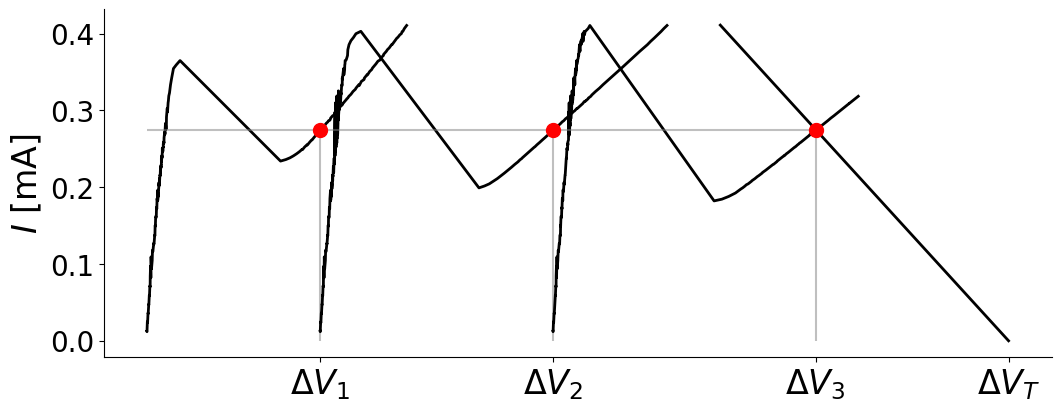

In [15]:
fig, ax = plt.subplots(figsize=(10.5,4), constrained_layout=True)
ax.plot(V1, I1, c='k', linewidth=2)
ax.scatter(point.V1, point.Vr/R0, s=100, c='r', zorder=3)
ax.vlines(point.V1, 0, point.Vr/R0, alpha=0.5, color='gray')
ax.plot(V2+point.V1, I2, c='k', linewidth=2)
ax.scatter(point.V1+point.V2, point.Vr/R0, s=100, c='r', zorder=3)
ax.vlines(point.V1+point.V2, 0, point.Vr/R0, alpha=0.5, color='gray')
ax.plot(V3+point.V1+point.V2, I3, c='k', linewidth=2)
ax.scatter(point.V3+point.V1+point.V2, point.Vr/R0, s=100, c='r', zorder=3)
ax.vlines(point.V1+point.V2 + point.V3, 0, point.Vr/R0, alpha=0.5, color='gray')
ax.hlines(point.Vr/R0, 0, point.V1+point.V2 + point.V3, alpha=0.5, color='gray')

addl = 1.5
xpts = [point.V0-point.Vr*addl, point.V0-point.Vr, point.V0]
ypts = [point.Vr*addl/R0, point.Vr/R0, 0]
ax.plot(xpts, ypts, c='k', linewidth=2)

ax.set_xticks([point.V1, point.V1+point.V2, point.V1 + point.V2+point.V3, point.V0])
ax.set_xticklabels([r'$\Delta V_1$', r'$\Delta V_2$',r'$\Delta V_3$',r'$\Delta V_T$'], fontsize=24)
# ax.set_yticks([])
ax.set_ylabel(r'$I$ [mA]', fontsize=24)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.savefig('figures/geometric_construction_3NDR.png')

In [16]:
df = pd.read_csv('data/geo_construct_c_data_1', sep='\t')
print(df)
df = df.rename(columns = {'time': 't', 'V(n1)': 'V0', 'V(n2)': 'V1', 'V(n3)': 'V2', 'V(n4)': 'V3', 
                     'I(Ndr1)':'I1', 'I(Ndr2)':'I2', 'I(Ndr3)':'I3',
                    'I(R1)':'IR', 'I(V1)': 'I0'})

df['dV1'] = df.V1 - df.V2
df['dV2'] = df.V2 - df.V3
df['dV3'] = df.V3
df['dVR'] = df.V0 - df.V1

df.I0*=1e3
df.IR*=1e3
df.I1*=1e3
df.I2*=1e3
df.I3*=1e3

           time     V(n1)         V(n2)         V(n3)         V(n4)  \
0      0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
1      0.010063  0.010063  6.054062e-03  4.231769e-03  2.227247e-03   
2      0.020303  0.020303  1.221455e-02  8.537926e-03  4.493645e-03   
3      0.030543  0.030543  1.837503e-02  1.284408e-02  6.760044e-03   
4      0.040783  0.040783  2.453551e-02  1.715024e-02  9.026442e-03   
...         ...       ...           ...           ...           ...   
4224  39.974491  0.025509  1.534630e-02  1.072702e-02  5.645798e-03   
4225  39.984731  0.015269  9.185821e-03  6.420858e-03  3.379399e-03   
4226  39.994971  0.005029  3.025338e-03  2.114701e-03  1.113001e-03   
4227  39.999991  0.000009  5.257518e-06  3.675007e-06  1.934226e-06   
4228  40.000000  0.000000  2.429142e-10  1.887057e-10  1.109676e-10   

             I(C1)         I(C2)         I(C3)       I(Ndr1)       I(Ndr2)  \
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.00000

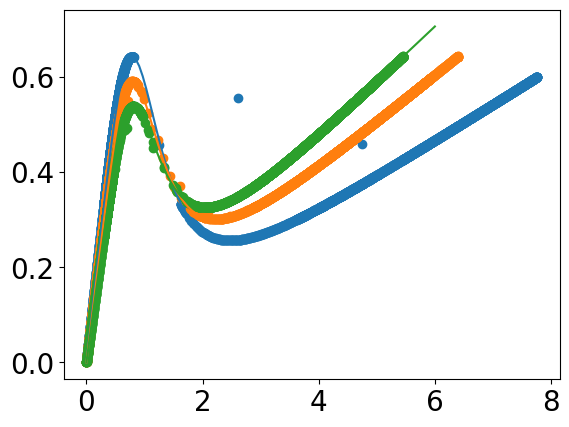

In [17]:
plt.scatter(df.dV1, df.I1)
plt.scatter(df.dV2, df.I2)
plt.scatter(df.dV3, df.I3)

def R(dV, gamma=1, epsilon=1):
    numer = (1 + dV**4)
    denom = gamma*(1 + epsilon*dV**4)
    return numer/denom

def Icurve(dV, gamma=1, epsilon=1):
    return dV*(1/R(dV, gamma, epsilon))

dVref = np.linspace(0, 6, num=100)
I1curve = Icurve(dVref, gamma=0.0011, epsilon=0.07)*1e3
I2curve = Icurve(dVref, gamma=0.001, epsilon=0.1)*1e3
I3curve = Icurve(dVref, gamma=0.0009, epsilon=0.13)*1e3

plt.plot(dVref, I1curve)
plt.plot(dVref, I2curve)
plt.plot(dVref, I3curve)

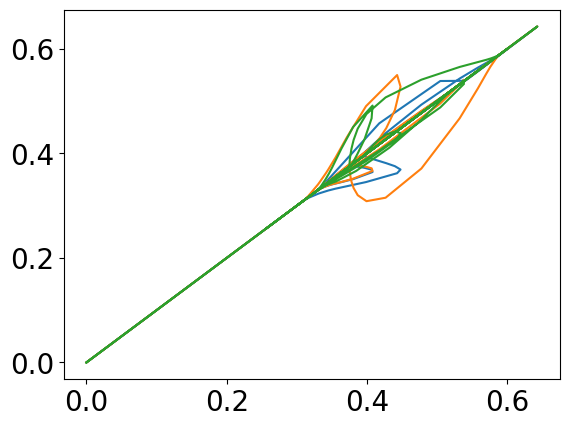

In [18]:
plt.plot(df.IR, df.I1)
plt.plot(df.IR, df.I2)
plt.plot(df.IR, df.I3)

In [19]:
def plot_location(df, ipoint, ax, nospine=True):
    point = df.iloc[ipoint]
    
    print(point.V0, point.dV1 + point.dV2 + point.dV3 + point.dVR)
    
    ax.plot(dVref, I1curve, c='k', linewidth=2)
    ax.scatter(point.dV1, point.I1, s=70, c='r', zorder=3)
    ax.vlines(point.dV1, 0, point.I1, alpha=0.5, color='gray')
    ax.plot(dVref+point.dV1, I2curve, c='k', linewidth=2)
    ax.scatter(point.dV1+point.dV2, point.I2, s=70, c='r', zorder=3)
    ax.vlines(point.dV1+point.dV2, 0, point.I2, alpha=0.5, color='gray')
    ax.plot(dVref+point.dV1+point.dV2, I3curve, c='k', linewidth=2)
    ax.scatter(point.dV3 + point.dV1+point.dV2, point.I3, s=70, c='r', zorder=3)
    ax.vlines(point.dV1 + point.dV2 + point.dV3, 0, point.I3, alpha=0.5, color='gray')
    ax.hlines(point.IR, 0, point.dV1 + point.dV2 + point.dV3, alpha=0.5, color='gray')

    addl = 2
    xpts = [point.V0 - point.dVR*addl, point.V0 - point.dVR, point.V0]
    ypts = [point.IR*addl, point.IR, 0]
    ax.plot(xpts, ypts, c='k', linewidth=2)
    
    if nospine:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
    return ax

2.047823 2.047823
4.699622 4.699622
9.225362 9.225362
14.49882 14.498819999999998


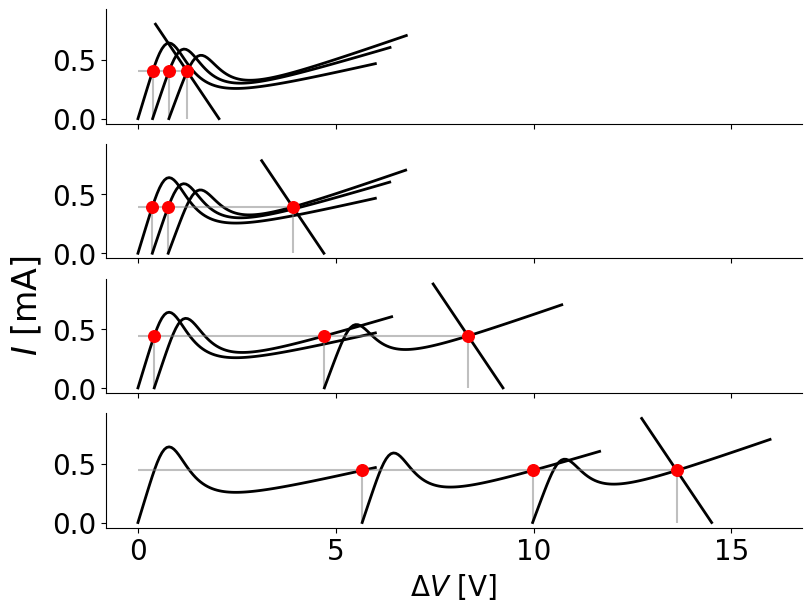

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,6), constrained_layout=True, sharex=True, sharey=True)
# fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(7,5), constrained_layout=True, sharex=True, sharey=True)
plot_location(df, 200, ax1)
plot_location(df, 500, ax2)
plot_location(df, 1000, ax3)
plot_location(df, 1600, ax4)

ax4.set_xticks([0,5,10,15])
fig.supylabel(r'$I$ [mA]')
ax4.set_xlabel(r'$\Delta V$ [V]')

fig.savefig('figures/geometric_construction_3NDR_c.png')

2.047823 2.047823
9.225362 9.225362
14.49882 14.498819999999998


Text(0.5, 40.0, '$\\Delta V$ [V]')

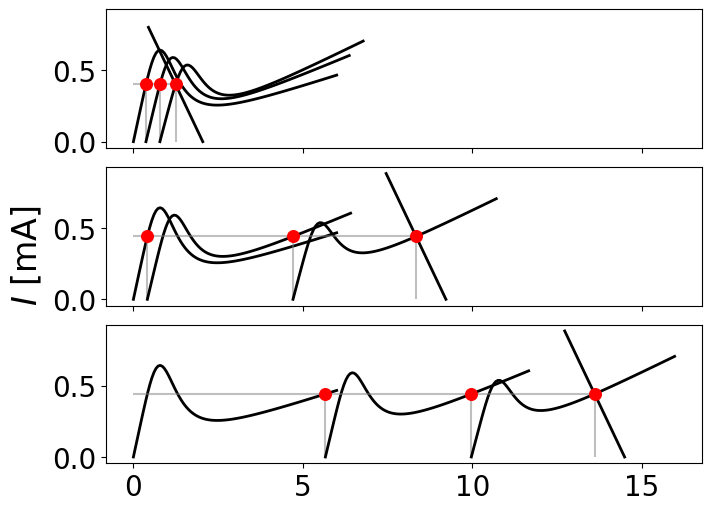

In [144]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,5), constrained_layout=True, sharex=True, sharey=True)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(7,5), constrained_layout=True, sharex=True, sharey=True)
plot_location(df, 200, ax1)
plot_location(df, 1000, ax2)
plot_location(df, 1600, ax3)
# plot_location(df, 1600, ax4)

ax4.set_xticks([0,5,10,15])
fig.supylabel(r'$I$ [mA]')
ax4.set_xlabel(r'$\Delta V$ [V]')

# fig.savefig('figures/geometric_construction_3NDR_c.png')

In [174]:
df = pd.read_csv('data/geo_contruct_data_2.txt', sep='\t')
print(df)
df = df.rename(columns = {'time': 't', 'V(n1)': 'V0', 'V(n2)': 'V1', 
                     'I(Ndr1)':'I1', 'I(Ndr2)':'I2',
                    'I(R1)':'IR1', 'I(R2)':'IR2', 'I(V1)': 'I0'})

df.I1 *=1e3
df.I2 *=1e3
df.IR1 *=1e3
df.IR2 *=1e3

           time     V(n1)         V(n2)       I(Ndr1)       I(Ndr2)  \
0      0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
1      0.010063  0.010063  1.397654e-03  1.537419e-06  1.397654e-06   
2      0.020303  0.020303  2.819876e-03  3.101864e-06  2.819876e-06   
3      0.030543  0.030543  4.242098e-03  4.666308e-06  4.242098e-06   
4      0.040783  0.040783  5.664321e-03  6.230753e-06  5.664320e-06   
...         ...       ...           ...           ...           ...   
3904  39.976755  0.023245  3.228472e-03  3.551319e-06  3.228472e-06   
3905  39.986995  0.013005  1.806250e-03  1.986875e-06  1.806250e-06   
3906  39.997235  0.002765  3.840275e-04  4.224302e-07  3.840275e-07   
3907  39.999995  0.000005  6.941548e-07  7.635704e-10  6.941548e-10   
3908  40.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   

             I(R1)         I(R2)         I(V1)  
0     0.000000e+00  0.000000e+00  0.000000e+00  
1     4.332727e-06  1.397654e-06 -4.332727e-06  


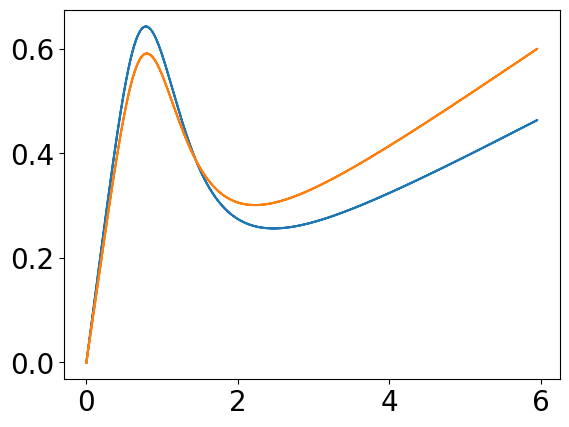

In [175]:
idx = 400
# plt.plot(df.t, df.V0)

row = df.iloc[idx]
# plt.scatter(row.t, row.V0)

plt.plot(df.V1, df.I1)
plt.plot(df.V1, df.I2)

# plt.plot(df.t, df.V1)

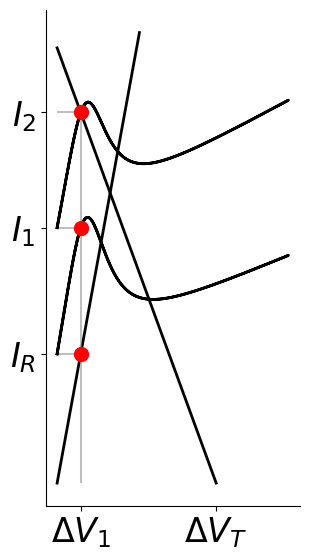

In [181]:
fig, ax = plt.subplots(figsize=(3.5,6))
tcutoff = 7.5
ax.plot(df[df.t < tcutoff].V1, df[df.t< tcutoff].IR2, c='k', linewidth=2)
ax.scatter(row.V1, row.IR2, s=100, c='r', zorder=3)
ax.hlines(row.IR2, 0, row.V1, alpha=0.5, color='gray')

ax.plot(df.V1, df.I1+row.IR2, c='k', linewidth=2)
ax.scatter(row.V1, row.I1+row.IR2, s=100, c='r', zorder=3)
ax.hlines(row.I1+row.IR2, 0, row.V1, alpha=0.5, color='gray')

ax.plot(df.V1, df.I2+row.I1+row.IR2, c='k', linewidth=2)
ax.scatter(row.V1, row.I1+row.I2+row.IR2, s=100, c='r', zorder=3)
ax.hlines(row.I1+row.I2+row.IR2, 0, row.V1, alpha=0.5, color='gray')

ax.vlines(row.V1, 0, row.I1+row.I2+row.IR2, alpha=0.5, color='gray')

slope = row.IR1/(row.V1 - row.V0)
xpts = np.array([0, row.V1, row.V0])
ypts = np.array([row.IR1- slope*row.V1, row.IR1, 0])
ax.plot(xpts, ypts, c='k', linewidth=2)

ax.set_xticks([row.V1, row.V0])
ax.set_xticklabels([r'$\Delta V_1$', r'$\Delta V_T$'], fontsize=24)
ax.set_yticks([row.IR2, row.IR2+row.I1, row.I1+row.I2+row.IR2])
ax.set_yticklabels([r'$I_R$', r'$I_1$', r'$I_2$'], fontsize=24)



ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.tight_layout()
fig.savefig('figures/geometric_construction_parallel.png')
# ax.set_xlim(0, 2.9)
# ax.set_ylim(0, 2.9)

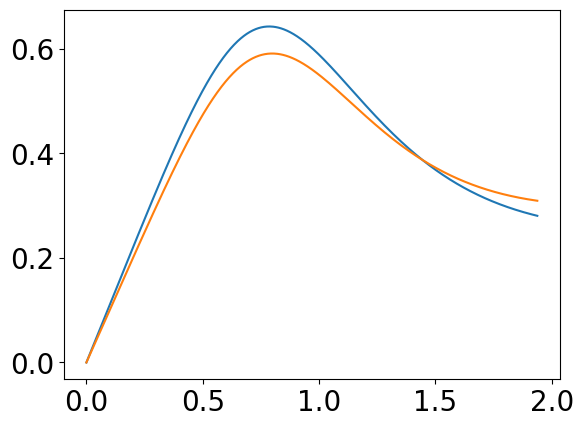

In [141]:
plt.plot(df.V1, df.I1)
plt.plot(df.V1, df.I2)
# plt.plot(df.V1, df.IR2)

In [8]:
df

t        V0            V1            V2            V3  \
0      0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
1      0.010063  0.010063  6.054062e-03  4.231769e-03  2.227247e-03   
2      0.020303  0.020303  1.221455e-02  8.537926e-03  4.493645e-03   
3      0.030543  0.030543  1.837503e-02  1.284408e-02  6.760044e-03   
4      0.040783  0.040783  2.453551e-02  1.715024e-02  9.026442e-03   
...         ...       ...           ...           ...           ...   
4224  39.974491  0.025509  1.534630e-02  1.072702e-02  5.645798e-03   
4225  39.984731  0.015269  9.185821e-03  6.420858e-03  3.379399e-03   
4226  39.994971  0.005029  3.025338e-03  2.114701e-03  1.113001e-03   
4227  39.999991  0.000009  5.257518e-06  3.675007e-06  1.934226e-06   
4228  40.000000  0.000000  2.429142e-10  1.887057e-10  1.109676e-10   

             I(C1)         I(C2)         I(C3)            I1            I2  \
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    -1.810865e-13 -1.991952e-13 -2.213280e-13  2.004522e-03  2.004522e-03   
2    -1.810865e-13 -1.991952e-13 -2.213280e-13  4.044281e-03  4.044281e-03   
3    -1.810865e-13 -1.991952e-13 -2.213280e-13  6.084039e-03  6.084039e-03   
4    -1.810865e-13 -1.991952e-13 -2.213280e-13  8.123798e-03  8.123798e-03   
...            ...           ...           ...           ...           ...   
4224  1.810865e-13  1.991952e-13  2.213280e-13  5.081218e-03  5.081218e-03   
4225  1.810865e-13  1.991952e-13  2.213280e-13  3.041459e-03  3.041459e-03   
4226  1.810865e-13  1.991952e-13  2.213280e-13  1.001701e-03  1.001701e-03   
4227  1.810865e-13  1.991952e-13  2.213280e-13  1.740763e-06  1.740781e-06   
4228  1.810865e-13  1.991952e-13  2.213280e-13  5.962941e-11  7.773806e-11   

                I3            IR            I0           dV1           dV2  \
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1     2.004522e-03  2.004522e-03 -2.004522e-03  1.822293e-03  2.004522e-03   
2     4.044281e-03  4.044281e-03 -4.044281e-03  3.676624e-03  4.044281e-03   
3     6.084039e-03  6.084040e-03 -6.084040e-03  5.530950e-03  6.084036e-03   
4     8.123798e-03  8.123798e-03 -8.123798e-03  7.385270e-03  8.123798e-03   
...            ...           ...           ...           ...           ...   
4224  5.081218e-03  5.081217e-03 -5.081217e-03  4.619280e-03  5.081222e-03   
4225  3.041459e-03  3.041459e-03 -3.041459e-03  2.764963e-03  3.041459e-03   
4226  1.001701e-03  1.001700e-03 -1.001700e-03  9.106370e-04  1.001700e-03   
4227  1.740803e-06  1.740582e-06 -1.740582e-06  1.582511e-06  1.740781e-06   
4228  9.987086e-11 -1.214571e-10  1.214571e-10  5.420850e-11  7.773810e-11   

               dV3           dVR  
0     0.000000e+00  0.000000e+00  
1     2.227247e-03  4.009048e-03  
2     4.493645e-03  8.088560e-03  
3     6.760044e-03  1.216808e-02  
4     9.026442e-03  1.624760e-02  
...            ...           ...  
4224  5.645798e-03  1.016244e-02  
4225  3.379399e-03  6.082919e-03  
4226  1.113001e-03  2.003401e-03  
4227  1.934226e-06  3.481164e-06  
4228  1.109676e-10 -2.429142e-10  

[4229 rows x 17 columns]

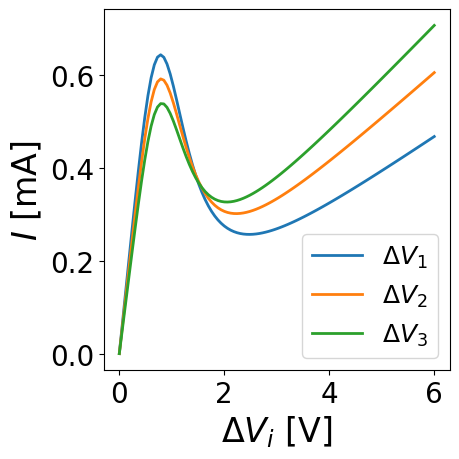

In [24]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(dVref, I1curve, linewidth=2, label=r'$\Delta V_1$')
ax.plot(dVref, I2curve, linewidth=2, label=r'$\Delta V_2$')
ax.plot(dVref, I3curve, linewidth=2, label=r'$\Delta V_3$')

ax.set_ylabel(r'$I$ [mA]', fontsize=24)
ax.set_xlabel(r'$\Delta V_i$ [V]', fontsize=24)
ax.legend(fontsize=18)

# width = 0.33
# height = 0.15
# xstart = 0.6
# ystart = 0.1

# ax2 = ax.inset_axes([xstart, ystart, width, height])
fig.tight_layout()
fig.savefig('figures/3NDR_IVcurves.png')